<a href="https://colab.research.google.com/github/HKcode22/MLPredictiveAnalysisStoreProject/blob/main/Predictive_Sales_Analysis_Forecasting_Walmart_(SuccesComplete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import logging
import pandas as pd
import numpy as np
from google.colab import files, drive
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns


# mount Google Drive
drive.mount('/content/drive')

# function to reduce the dataset size using stratified sampling
def stratified_sampling(df, stratify_column, n_samples):
    logging.info("Reducing dataset size using stratified sampling...")

    # checking if stratify_column exists
    if stratify_column not in df.columns:
        raise ValueError(f"Column '{stratify_column}' does not exist in the dataframe.")

    # Check class distribution
    class_counts = df[stratify_column].value_counts()
    print("Class distribution before filtering:")
    print(class_counts)

    # Remove classes with fewer than 2 members
    valid_classes = class_counts[class_counts > 1].index
    filtered_df = df[df[stratify_column].isin(valid_classes)]

    # Check class distribution after filtering
    class_counts_after = filtered_df[stratify_column].value_counts()
    print("Class distribution after filtering:")
    print(class_counts_after)

    split = StratifiedShuffleSplit(n_splits=1, test_size=n_samples, random_state=42)
    for _, sample_index in split.split(filtered_df, filtered_df[stratify_column]):
        stratified_sample = filtered_df.iloc[sample_index]

    logging.info("Dataset size reduced.")
    return stratified_sample

file_path = '/content/drive/MyDrive/Walmart-Retail-Dataset_2.csv'
try:
    dataset = pd.read_csv(file_path, delimiter=',', header=0, on_bad_lines='warn')
except pd.errors.ParserError as e:
    logging.error(f"Error reading CSV file: {e}")
    # Trying to load the file with a different error handling strategy
    dataset = pd.read_csv(file_path, delimiter=',', header=0, on_bad_lines='warn')
    logging.warning("Attempting to load the file with 'on_bad_lines=warn'. Check for warnings to identify problematic lines.")

# Print column names to verify them
print("Column names in the dataset:")
print(dataset.columns)

# Remove leading/trailing spaces in column names
dataset.columns = dataset.columns.str.strip()

# Reduce dataset size using stratified sampling
stratify_column = 'region'
n_samples = 1000  # Number of samples
dataset = stratified_sampling(dataset, stratify_column, n_samples)

# Display the reduced dataset
logging.info("Processed Data Preview:")
logging.info(dataset.head())
print("Reduced Processed Dataset:")
print(dataset.to_string())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Skipping line 7761: expected 23 fields, saw 35
Skipping line 25819: expected 23 fields, saw 35

Skipping line 83094: expected 23 fields, saw 35
Skipping line 83828: expected 23 fields, saw 35
Skipping line 89227: expected 23 fields, saw 35

Skipping line 171167: expected 23 fields, saw 35

Skipping line 239560: expected 23 fields, saw 35

Skipping line 276923: expected 23 fields, saw 35

<ipython-input-62-b4a821c39d91>:57: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path, delimiter=',', header=0, on_bad_lines='warn')


Column names in the dataset:
Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code'],
      dtype='object')
Class distribution before filtering:
region
East           114983
Central        103825
West            70732
South           69185
40.2              222
                ...  
17241.02421         1
-12257.5283         1
584.78259           1
25069.59158         1
24515.77028         1
Name: count, Length: 6302, dtype: int64
Class distribution after filtering:
region
East          114983
Central       103825
West           70732
South          69185
40.2             222
\N                 4
-210.58665         2
Name: count, dtype: int64
Reduced Processed 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Display the first few rows and column names to understand the structure
print("Column names in the dataset:")
print(dataset.columns)
print("\nFirst few rows of the dataset:")
print(dataset.head())

Column names in the dataset:
Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code'],
      dtype='object')

First few rows of the dataset:
               city customer_age      customer_name customer_segment discount  \
128105       Euless           76  Christine Abelman        Corporate     0.08   
225930   Burlington           65       Sonia Cooley        Corporate     0.22   
355800     Moorhead           80   Kristen Hastings      Home Office     0.18   
47215         Hurst           45       Logan Currie         Consumer     0.22   
161123  Chattanooga           85        Cyma Kinney      Home Office     0.05   

        order_date                       

In [ ]:
# pip install psutil

In [ ]:
import os

memory_usage_bytes = dataset.memory_usage(deep=True)

# Convert bytes to megabytes
memory_usage_mb = memory_usage_bytes

print(f"Approximate size of the dataset: {memory_usage_mb} MB")



Approximate size of the dataset: Index                    8000
city                    66071
customer_age            59000
customer_name           69783
customer_segment        67541
discount                60855
order_date              67000
order_id                93000
order_priority          63792
order_quantity          58853
product_base_margin     60875
product_category        69226
product_container       66047
product_name            91481
product_sub_category    73599
profit                  67715
region                  62060
sales                   62894
ship_date               67000
ship_mode               68924
shipping_cost           74298
state                   64665
unit_price              61856
zip_code                42078
dtype: int64 MB


In [ ]:

# Function to check for negative values
def check_for_negative_values(dataset, stage):
    logging.info(f"Checking for negative values after {stage}...")  # Log message for checking negative values
    numerical_features = dataset.select_dtypes(include=[np.number]).columns  # Get numerical columns
    for feature in numerical_features:  # Iterate through numerical columns
        if (dataset[feature] < 0).any():  # Check if there are negative values
            dataset[feature] = abs(dataset[feature])  # Convert negative values to positive
            logging.warning(f'Negative values found and converted to positive in {feature} after {stage}.')

# Data validation function
def validate_data(dataset):
    logging.info('Validating dataset...')  # Log message for dataset validation
    if dataset.isnull().values.any():  # Check for any missing values
        logging.warning('Dataset contains missing values.')  # Log a warning if there are missing values
    if dataset.duplicated().any():  # Check for duplicate entries
        logging.warning('Dataset contains duplicate entries.')  # Log a warning if there are duplicates

    logging.info(f"Dataset Info:\n{dataset.info()}")  # Log dataset info
    logging.info(f"Dataset Head:\n{dataset.head()}")  # Log first few rows of the dataset
    logging.info(f"Dataset Description:\n{dataset.describe()}")  # Log dataset description
    return True  # Return True after validation

# Function to standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

# Function to unstandardize the data
def unstandardize_data(scaled_data, scaler):
    original_data = scaler.inverse_transform(scaled_data)
    return original_data

print("Entire Processed Dataset:")
print(dataset.head())


Entire Processed Dataset:
         city  customer_age  customer_name  customer_segment  discount  \
128105  194.0          76.0          101.0               1.0      0.08   
225930   77.0          65.0          475.0               1.0      0.22   
355800  422.0          80.0          309.0               2.0      0.18   
47215   300.0          45.0          325.0               0.0      0.22   
161123   95.0          85.0          125.0               2.0      0.05   

       order_date  order_id  order_priority  order_quantity  \
128105 2022-09-27     194.0             0.0            20.0   
225930 2022-03-19     988.0             2.0            32.0   
355800 2021-08-28     392.0             4.0             3.0   
47215  2021-03-23     376.0             1.0             4.0   
161123 2022-04-30     686.0             2.0            16.0   

        product_base_margin  ...  profit_margin  order_date_dayofweek  \
128105                 0.49  ...      58.735697                     1   
2259

In [ ]:
# Data preprocessing function
def preprocess_data(dataset):
    # Check and rename columns if needed
    column_renames = {
        'price': 'price',
        'avg_rating': 'rating',
        'reviews_count': 'reviews_count',
        'brand': 'brand',
        'currency': 'currency',
        'primary_category': 'primary_category',
        'sub_category_1': 'sub_category_1',
        'sub_category_2': 'sub_category_2',
        'title': 'title',
        'url': 'url',
        'main_image': 'main_image',
        'description': 'description',
        'gtin13': 'gtin13',
        'model': 'model',
        'availableDeliveryMethod': 'availableDeliveryMethod',
        'specifications': 'specifications',
        'directions': 'directions',
        'ingredients': 'ingredients',
        'uniq_id': 'uniq_id',
        'scraped_at': 'scraped_at'
    }

    categorical_features = [
        'city', 'customer_name', 'customer_segment', 'order_id', 'order_priority',
        'product_category', 'product_container', 'product_name', 'product_sub_category',
        'region', 'ship_mode', 'state'
    ]

    # Convert columns to numeric
    dataset['customer_age'] = pd.to_numeric(dataset['customer_age'], errors='coerce')
    dataset['discount'] = pd.to_numeric(dataset['discount'], errors='coerce')
    dataset['order_quantity'] = pd.to_numeric(dataset['order_quantity'], errors='coerce')
    dataset['product_base_margin'] = pd.to_numeric(dataset['product_base_margin'], errors='coerce')
    dataset['profit'] = pd.to_numeric(dataset['profit'], errors='coerce')
    dataset['sales'] = pd.to_numeric(dataset['sales'], errors='coerce')
    dataset['shipping_cost'] = pd.to_numeric(dataset['shipping_cost'], errors='coerce')
    dataset['unit_price'] = pd.to_numeric(dataset['unit_price'], errors='coerce')
    dataset['zip_code'] = pd.to_numeric(dataset['zip_code'], errors='coerce')

    # Convert to datetime
    if 'order_date' in dataset.columns:
        dataset['order_date'] = pd.to_datetime(dataset['order_date'], errors='coerce')
    if 'ship_date' in dataset.columns:
        dataset['ship_date'] = pd.to_datetime(dataset['ship_date'], errors='coerce')

    for col in column_renames:  # Iterate through column renames
        if col in dataset.columns:  # Check if the column exists in the dataset
            dataset.rename(columns={col: column_renames[col]}, inplace=True)  # Rename the column

    for feature in categorical_features:
        dataset[feature] = dataset[feature].astype('category')  # Convert categorical features to categorical type

    # Convert categorical data to numerical
    logging.info("Converting categorical features to numerical...")  # Log message for converting categorical data
    label_encoders = {}  # Initialize a dictionary to store label encoders
    for feature in categorical_features:  # Iterate through categorical features
        if feature in dataset.columns:  # Check if the feature exists in the dataset
            label_encoders[feature] = LabelEncoder()  # Initialize label encoder for each feature
            dataset[feature] = label_encoders[feature].fit_transform(dataset[feature])  # Apply label encoding

    # Handle missing values
    logging.info("Handling missing values...")  # Log message for handling missing values
    imputer = SimpleImputer(strategy='mean')  # Initialize imputer to fill missing values with mean
    numerical_columns = dataset.select_dtypes(include=['number']).columns  # Select only numerical columns for imputation
    dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])  # Apply imputer and update DataFrame

    # # Normalize/Standardize data
    # logging.info("Normalizing/Standardizing data...")
    # numerical_features = ['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'profit', 'sales', 'shipping_cost', 'unit_price']
    scaler = StandardScaler()
    # dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

    # Feature engineering: Create new features
    logging.info("Creating new features...")  # Log message for feature engineering
    dataset['price_adjusted_by_quantity'] = dataset['unit_price'] * dataset['order_quantity']
    dataset['log_price'] = np.log1p(dataset['unit_price'])
    dataset['inverse_price'] = 1 / (dataset['unit_price'] + 1e-5)
    dataset['log_sales'] = np.log1p(dataset['sales'])
    dataset['discount_per_quantity'] = dataset['discount'] / (dataset['order_quantity'] + 1e-5)
    dataset['profit_margin'] = dataset['profit'] / (dataset['sales'] + 1e-5)

    # # Estimate missing 2023 data
    # yearly_sales = dataset.groupby('order_date_year')['sales'].sum()
    # yearly_sales_df = yearly_sales.reset_index()
    # yearly_sales_df['sales'] = yearly_sales_df['sales'].interpolate(method='linear')
    # for index, row in yearly_sales_df.iterrows():
    #     dataset.loc[dataset['order_date_year'] == row['order_date_year'], 'sales'] = row['sales']


    # Feature Engineering for Date Columns
    for col in ['order_date', 'ship_date']:
        if col in dataset.columns:
            dataset[col + '_dayofweek'] = dataset[col].dt.dayofweek
            dataset[col + '_month'] = dataset[col].dt.month
            dataset[col + '_year'] = dataset[col].dt.year
            dataset[col + '_dayssincestart'] = (dataset[col] - dataset[col].min()).dt.days

    # Drop the original datetime columns
    # dataset = dataset.drop(['order_date', 'ship_date'], axis=1)

    # Calculate estimated sales based on the features
    intercept = 0.1  # Placeholder value
    coef_quantity = 0.4  # Placeholder value
    coef_price = 0.3  # Placeholder value
    coef_discount = 0.2  # Placeholder value
    coef_profit = 0.1
    coef_log_sales = 0.1
    coef_discount_per_quantity = 0.05
    coef_profit_margin = 0.05
    coef_log_price = 0.1

    dataset = dataset[dataset['order_date_year'] != 2023]

    dataset['estimated_sales'] = abs(
        intercept
        + coef_quantity * dataset['order_quantity']
        + coef_price * dataset['unit_price']
        + coef_discount * dataset['discount']
        + coef_profit * dataset['profit']
        + coef_log_sales * dataset['log_sales']
        + coef_discount_per_quantity * dataset['discount_per_quantity']
        + coef_profit_margin * dataset['profit_margin']
        + coef_log_price * dataset['log_price']
    )

    #standardizing and normalizing estimated sales
    # scaler = StandardScaler()
    # dataset['estimated_sales'] = scaler.fit_transform(dataset[['estimated_sales']])
    # dataset['estimated_sales'] = (dataset['estimated_sales'] - dataset['estimated_sales'].min()) / (dataset['estimated_sales'].max() - dataset['estimated_sales'].min())


    # numerical_features = ['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'profit', 'sales', 'shipping_cost', 'unit_price', 'estimated_sales']
    # scaler = StandardScaler()
    # # Pass the list of columns, not a tuple
    # dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


    # Check for negative values
    check_for_negative_values(dataset, "after feature engineering")

    return dataset, label_encoders # Return preprocessed data, label encoders, and scaler

# Validate dataset
validate_data(dataset)  # Call the function to validate dataset

# Preprocess data
dataset, label_encoders = preprocess_data(dataset)

# Validate dataset again after preprocessing
validate_data(dataset)

# Display the first few rows of the processed data
logging.info("Processed Data Preview:")
print(dataset.head())

print('sales:')
print(dataset['sales'])


print('Estimated sales:')
print(dataset['estimated_sales'])

numerical_features = ['discount', 'order_quantity', 'product_base_margin', 'profit', 'profit_margin' ,'sales', 'shipping_cost', 'unit_price', 'estimated_sales']

#NOTE:
#no need to standardize/normalize dataset or else it will be done twice since we have to do it anyways in the regression models, pipleine, paramgrid


<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 263634 to 59755
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   city                        992 non-null    float64       
 1   customer_age                992 non-null    float64       
 2   customer_name               992 non-null    float64       
 3   customer_segment            992 non-null    float64       
 4   discount                    992 non-null    float64       
 5   order_date                  992 non-null    datetime64[ns]
 6   order_id                    992 non-null    float64       
 7   order_priority              992 non-null    float64       
 8   order_quantity              992 non-null    float64       
 9   product_base_margin         992 non-null    float64       
 10  product_category            992 non-null    float64       
 11  product_container           992 non-null    float64     

In [ ]:

print('Standardized')
# dataset = pd.DataFrame(dataset, columns=numerical_features)

dc = dataset.copy()
scaler = StandardScaler()
dc[numerical_features] = scaler.fit_transform(dc[numerical_features])
check_for_negative_values(dc, "after feature engineering")
print(dc.head())


Standardized
         city  customer_age  customer_name  customer_segment  discount  \
128105  194.0          76.0          101.0               1.0  0.627618   
225930   77.0          65.0          475.0               1.0  1.307200   
355800  422.0          80.0          309.0               2.0  0.754395   
47215   300.0          45.0          325.0               0.0  1.307200   
161123   95.0          85.0          125.0               2.0  1.042221   

       order_date  order_id  order_priority  order_quantity  \
128105 2022-09-27     194.0             0.0        0.448303   
225930 2022-03-19     988.0             2.0        0.406100   
355800 2021-08-28     392.0             4.0        1.658708   
47215  2021-03-23     376.0             1.0        1.587508   
161123 2022-04-30     686.0             2.0        0.733104   

        product_base_margin  ...  profit_margin  order_date_dayofweek  \
128105             0.205418  ...       0.062416                     1   
225930           

X shape: (992, 2), y shape: (992,)


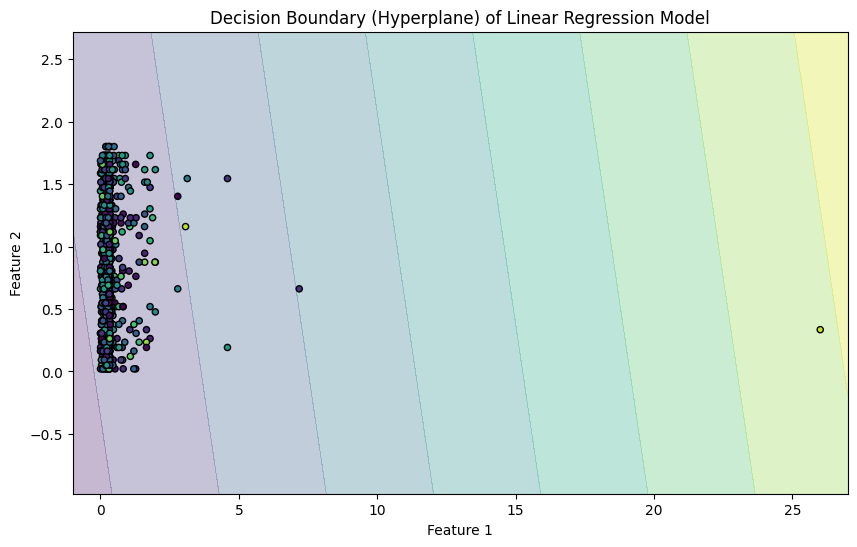

X shape: (992, 2), y shape: (992,)


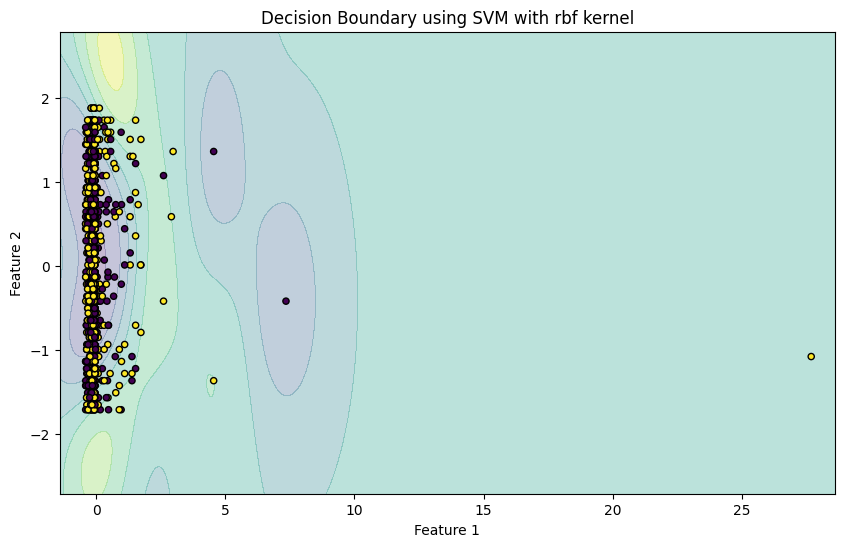

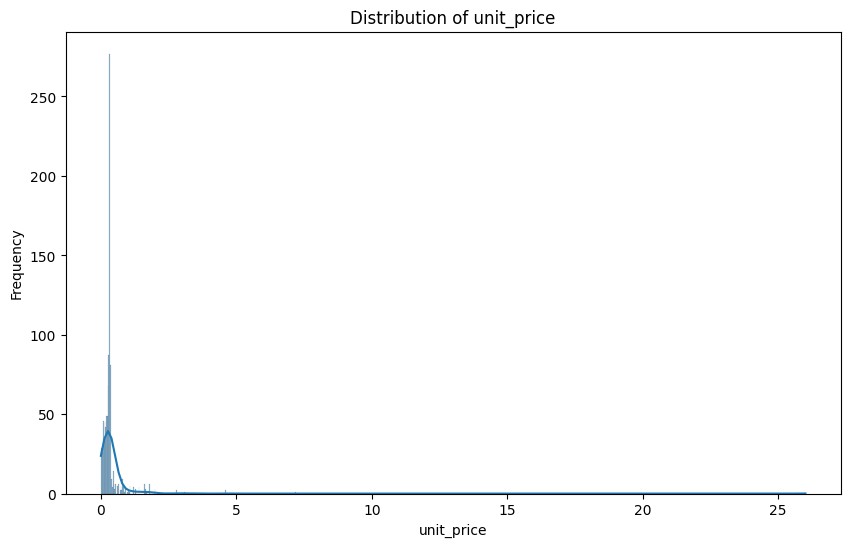

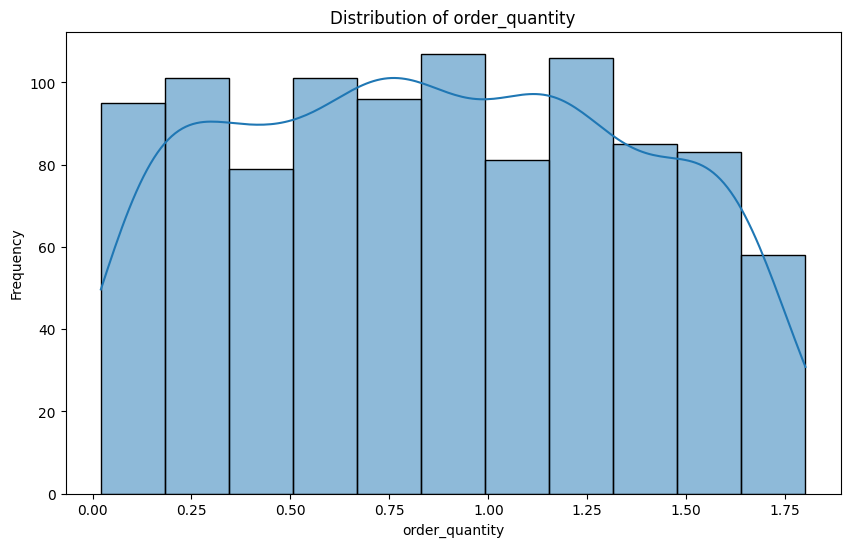

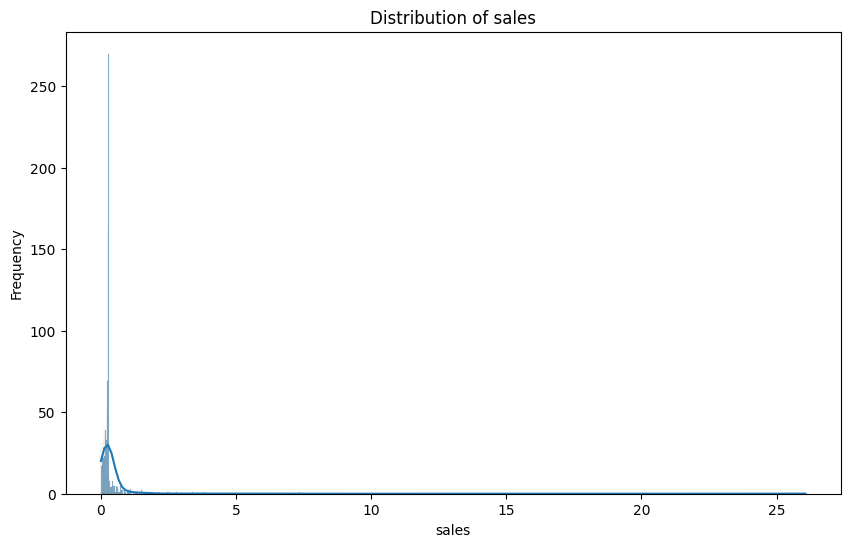

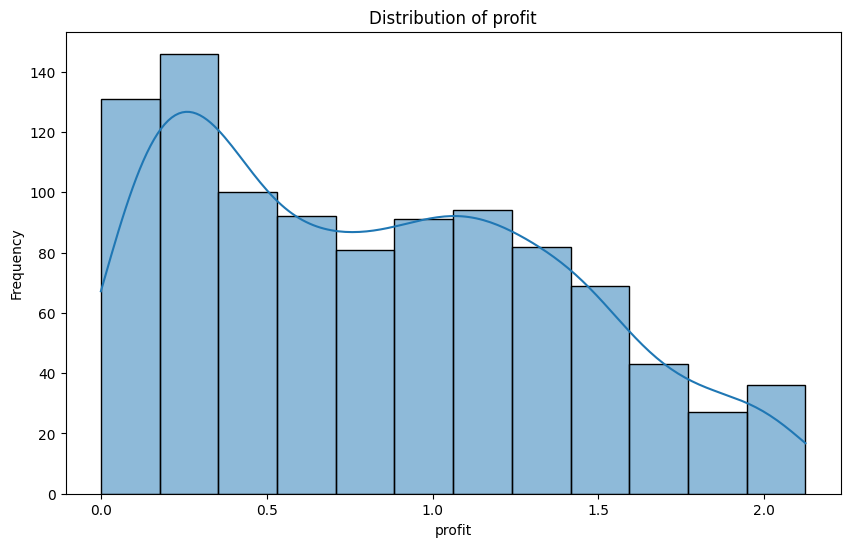

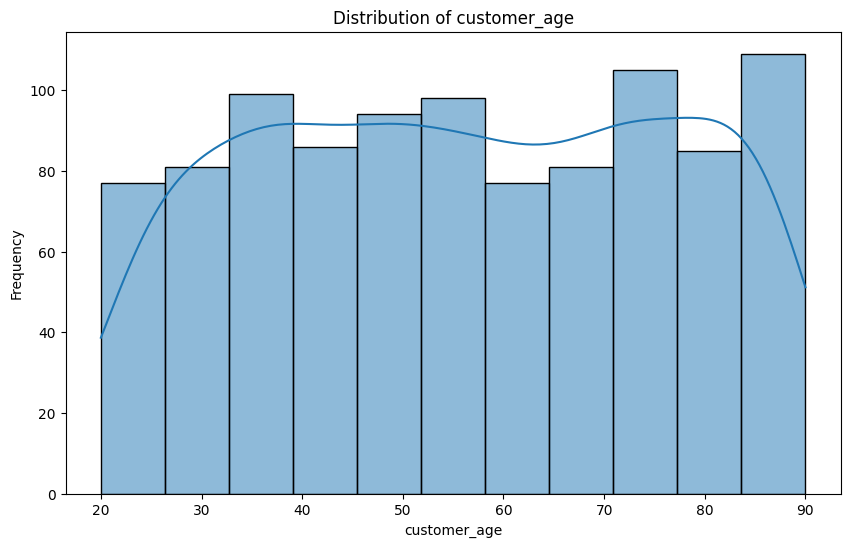

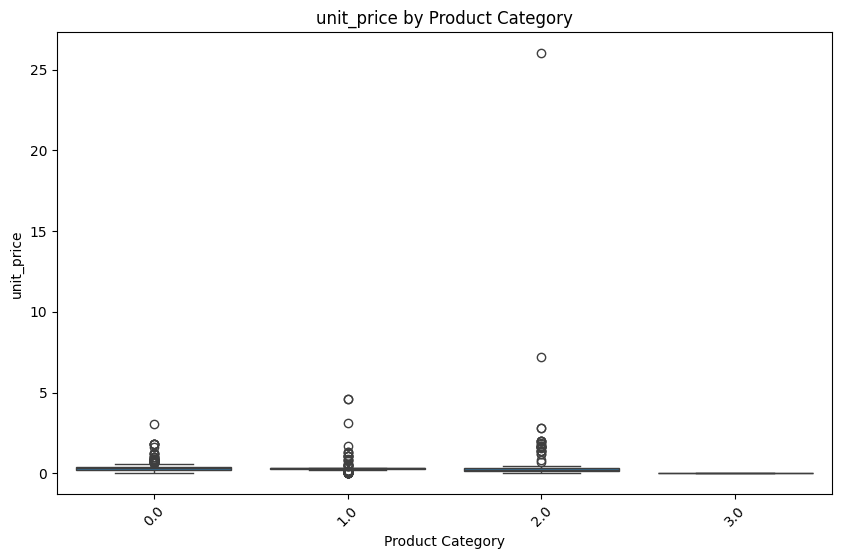

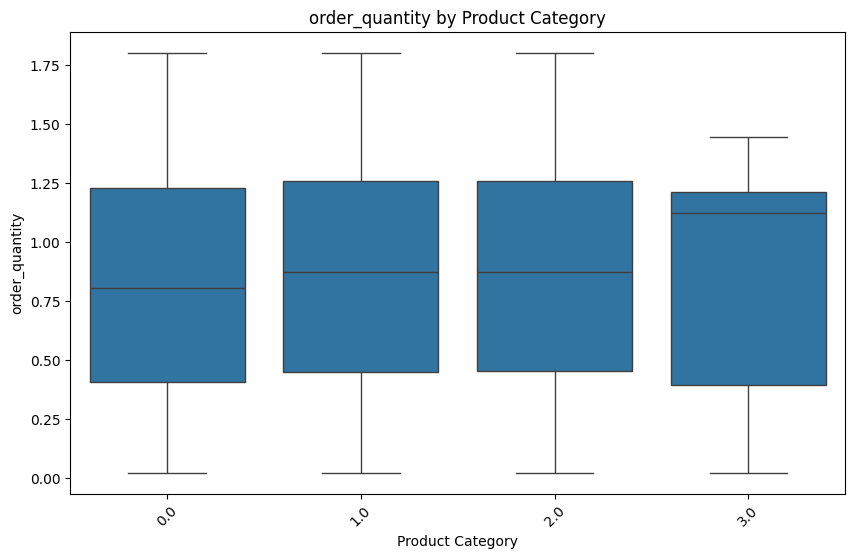

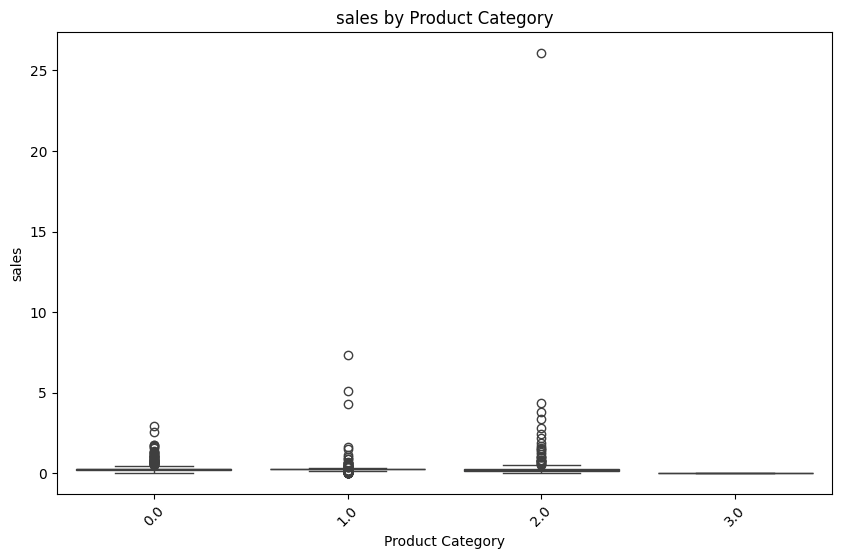

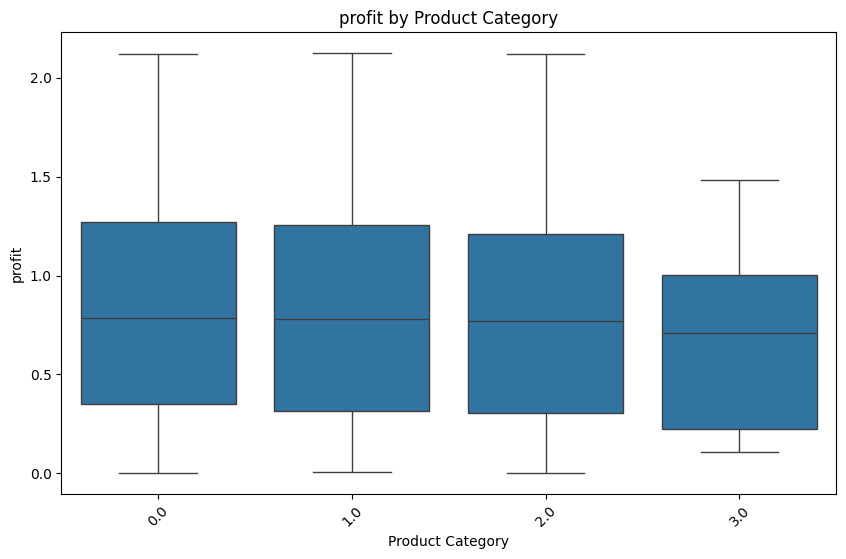

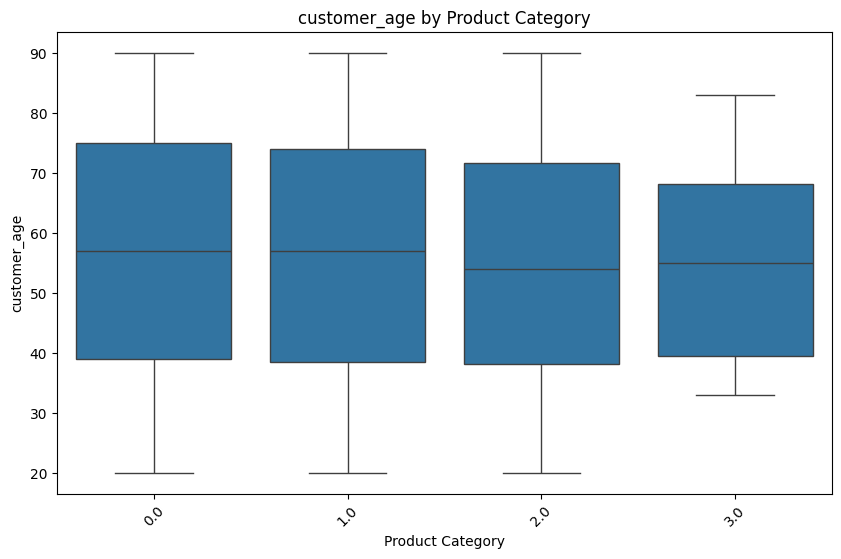

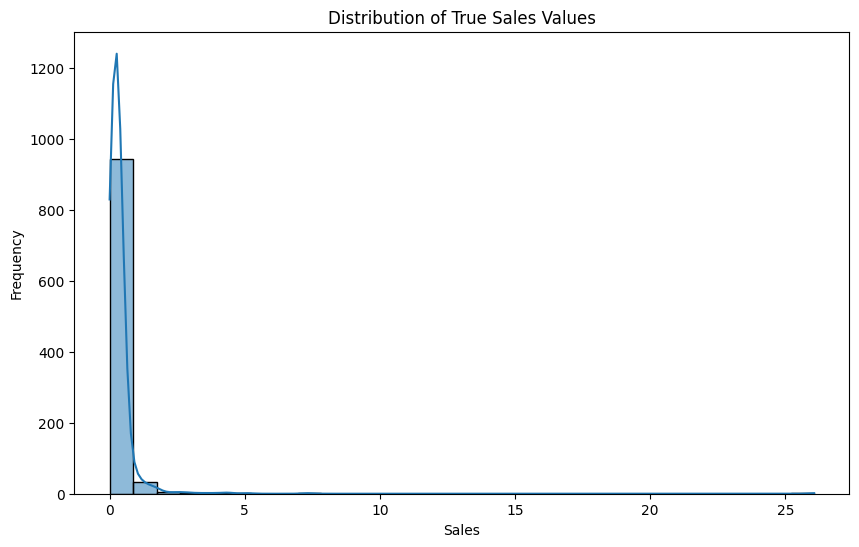

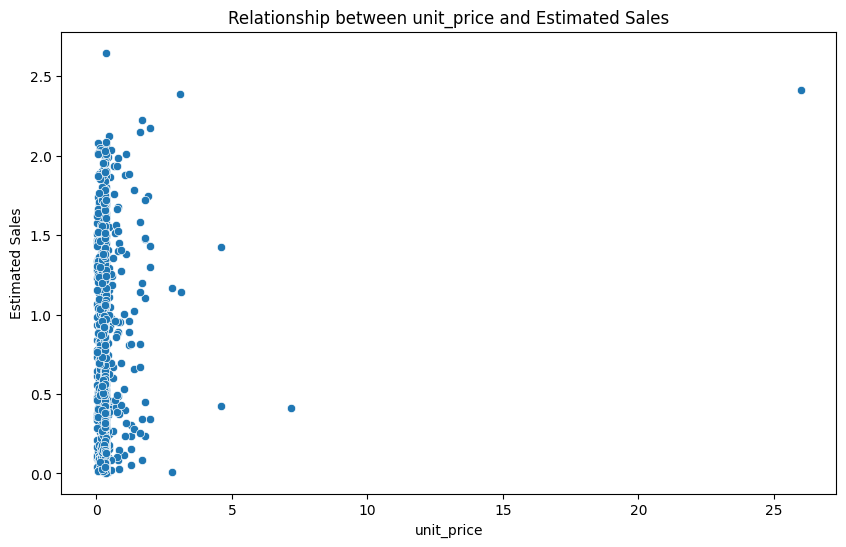

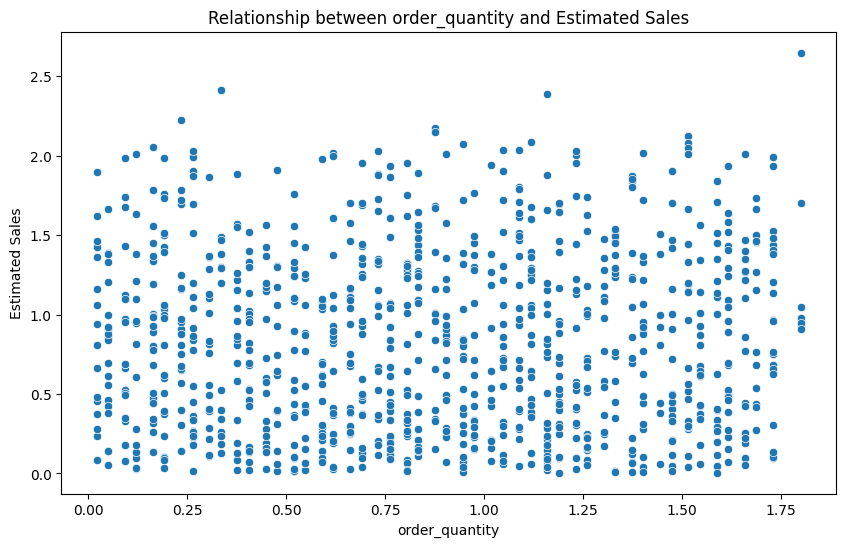

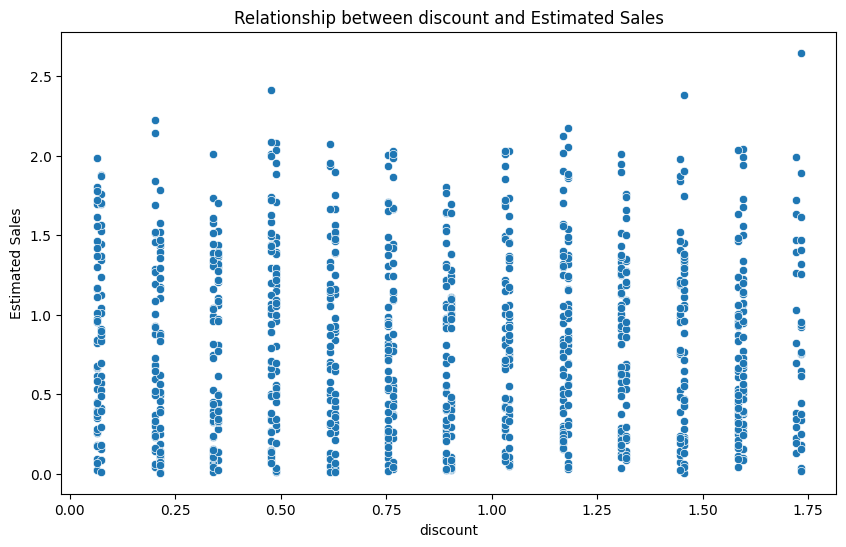

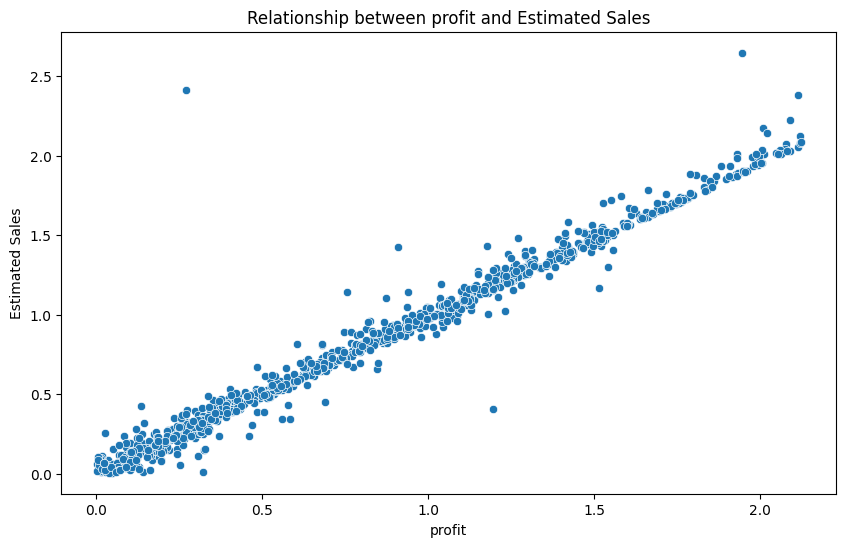

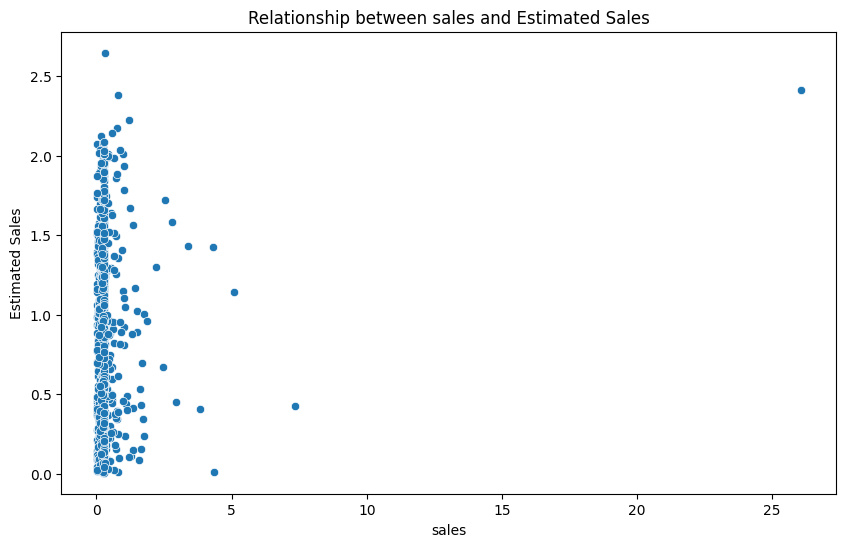

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Extended visualization function
def extended_visualization(data):


    logging.info("Creating extended visualizations...")

    # Distribution plots for numerical features
    numerical_features = ['unit_price', 'order_quantity', 'sales', 'profit', 'customer_age']
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[feature].dropna(), kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

    # Box plots for numerical features grouped by 'product_category'
    if 'product_category' in data.columns:
        for feature in numerical_features:
            plt.figure(figsize=(10, 6))
            if data['product_category'].ndim == 1 and data[feature].ndim == 1:
                sns.boxplot(x='product_category', y=feature, data=data)
                plt.title(f'{feature} by Product Category')
                plt.xlabel('Product Category')
                plt.ylabel(feature)
                plt.xticks(rotation=45)
                plt.show()
            else:
                logging.warning(f"Skipping boxplot for {feature} due to multi-dimensional data in 'product_category' or '{feature}'")

    # Histogram to visualize the distribution of True Sales values
    plt.figure(figsize=(10, 6))
    sns.histplot(data['sales'].dropna(), bins=30, kde=True)
    plt.title('Distribution of True Sales Values')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()

# Function to calculate correlation
def calculate_correlation(data):

    correlation = data.corr()  # Calculating correlation for all numerical features
    logging.info(f"Correlation Matrix:\n{correlation}")
    return correlation

# Function to visualize the relationship between features and estimated sales
def visualize_relationship(data):

    features = ['unit_price', 'order_quantity', 'discount', 'profit', 'sales']
    for feature in features:
        if feature in data.columns and 'estimated_sales' in data.columns:  # Check if columns exist in DataFrame
            plt.figure(figsize=(10, 6))
            plot_df = pd.DataFrame({
                feature: data[feature].values.ravel(),  # Ravel the array to ensure 1D
                'estimated_sales': data['estimated_sales'].values.ravel()  # Ravel the array to ensure 1D
            })
            sns.scatterplot(x=feature, y='estimated_sales', data=plot_df)  # Pass DataFrame to scatterplot
            plt.title(f'Relationship between {feature} and Estimated Sales')
            plt.xlabel(feature)
            plt.ylabel('Estimated Sales')
            plt.show()
        else:
            logging.warning(f"Skipping visualization for {feature} due to missing column(s).")

#Ravel flattens a multi dimensiol array

# Function to visualize the hyperplane for a linear regression model
def visualize_hyperplane(X, y):

    if X.shape[1] != 2:
        raise ValueError("Hyperplane visualization is only supported for 2D feature space.")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    model = LinearRegression()
    model.fit(X, y)

    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict values using the linear model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (Hyperplane) of Linear Regression Model')
    plt.show()

# Function to visualize the decision boundary using SVM with kernel trick
def visualize_svm_kernel(X, y, kernel='rbf'):

    if X.shape[1] != 2:
        raise ValueError("SVM kernel visualization is only supported for 2D feature space.")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = SVC(kernel=kernel, gamma='auto')
    model.fit(X_scaled, y)

    # Create a meshgrid for plotting
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict values using the SVM model
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary using SVM with {kernel} kernel')
    plt.show()

# Example usage for hyperplane visualization
# Ensure to select only two features for 2D visualization
try:
    if dc[['unit_price', 'order_quantity']].shape[1] == 2:
        X_hyperplane = dc[['unit_price', 'order_quantity']].values  # Select two features for 2D visualization
        y_hyperplane = dc['estimated_sales'].values
        visualize_hyperplane(X_hyperplane, y_hyperplane)
    else:
        print("Hyperplane visualization requires exactly 2 features.")
except ValueError as e:
    print(e)

# Example usage for SVM with kernel trick visualization
try:
    if dc[['unit_price', 'order_quantity']].shape[1] == 2:
        X_svm = dc[['unit_price', 'order_quantity']].values  #
        y_svm = np.where(dc['estimated_sales'] > dc['estimated_sales'].median(), 1, 0)  # Binary classification for visualization
        visualize_svm_kernel(X_svm, y_svm, kernel='rbf')
    else:
        print("SVM kernel visualization requires exactly 2 features.")
except ValueError as e:
    print(e)

extended_visualization(dc)
correlation_matrix = calculate_correlation(dc)
visualize_relationship(dc)


city: 992
customer_age: 992
customer_name: 992
customer_segment: 992
discount: 992
order_date: 992
order_id: 992
order_priority: 992
order_quantity: 992
product_base_margin: 992
product_category: 992
product_container: 992
product_name: 992
product_sub_category: 992
profit: 992
region: 992
sales: 992
ship_date: 992
ship_mode: 992
shipping_cost: 992
state: 992
unit_price: 992
zip_code: 992
price_adjusted_by_quantity: 992
log_price: 992
inverse_price: 992
log_sales: 992
discount_per_quantity: 992
profit_margin: 992
order_date_dayofweek: 992
order_date_month: 992
order_date_year: 992
order_date_dayssincestart: 992
ship_date_dayofweek: 992
ship_date_month: 992
ship_date_year: 992
ship_date_dayssincestart: 992
estimated_sales: 992


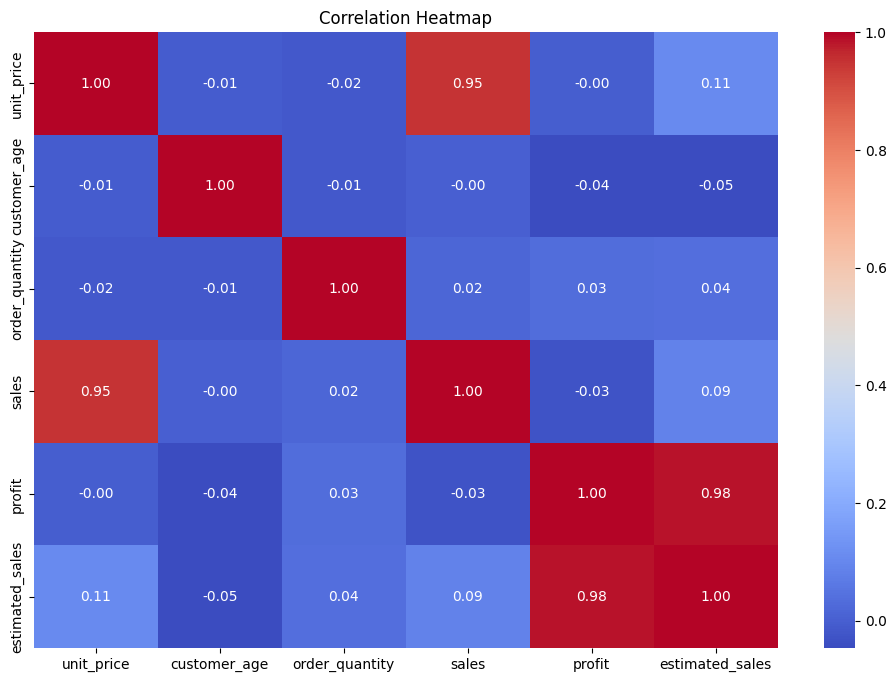

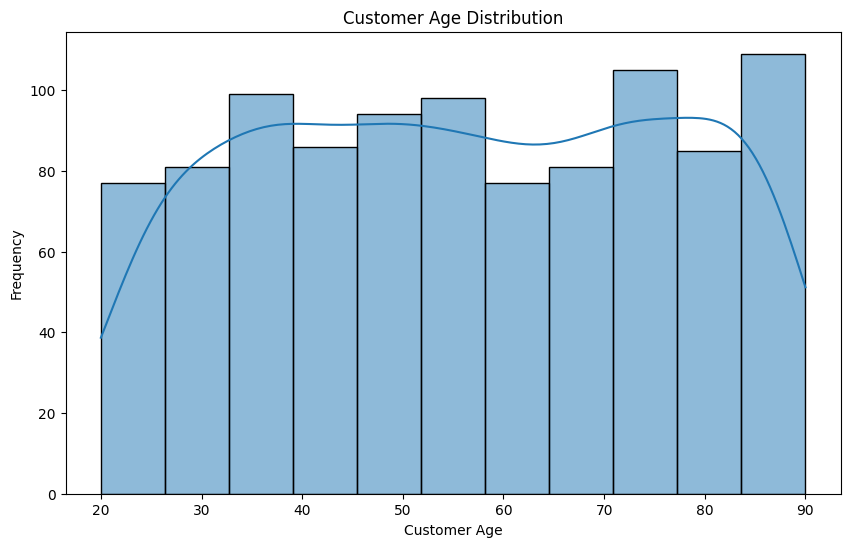

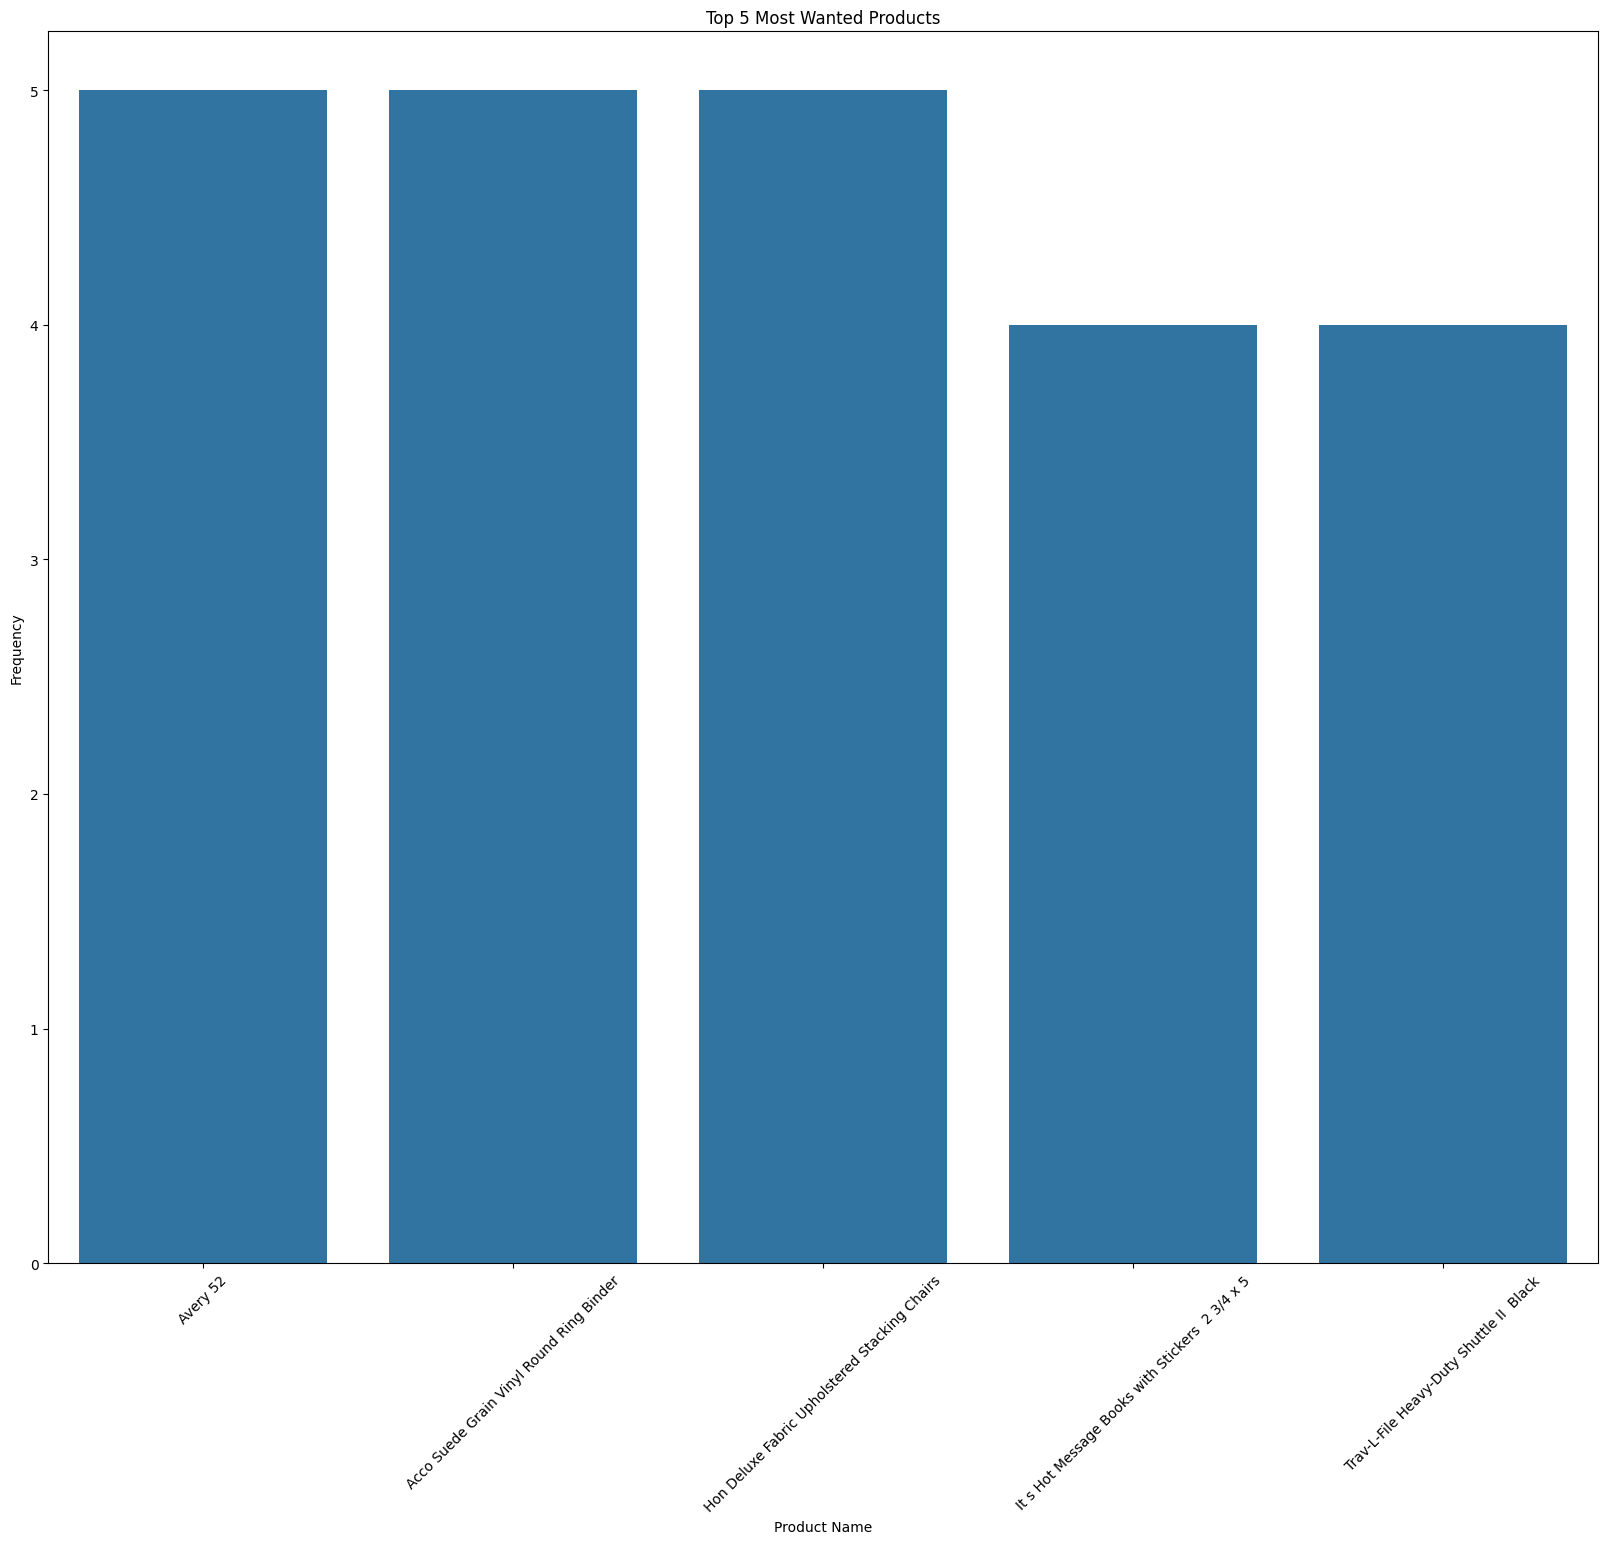

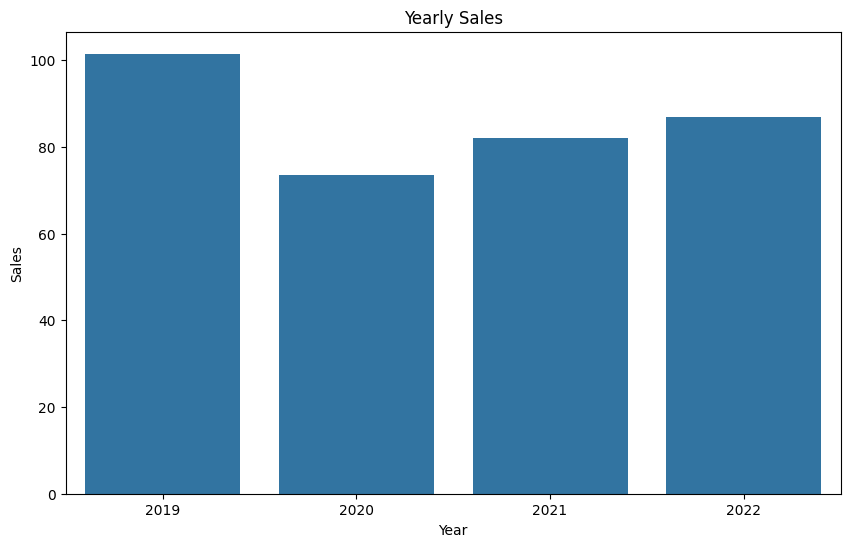

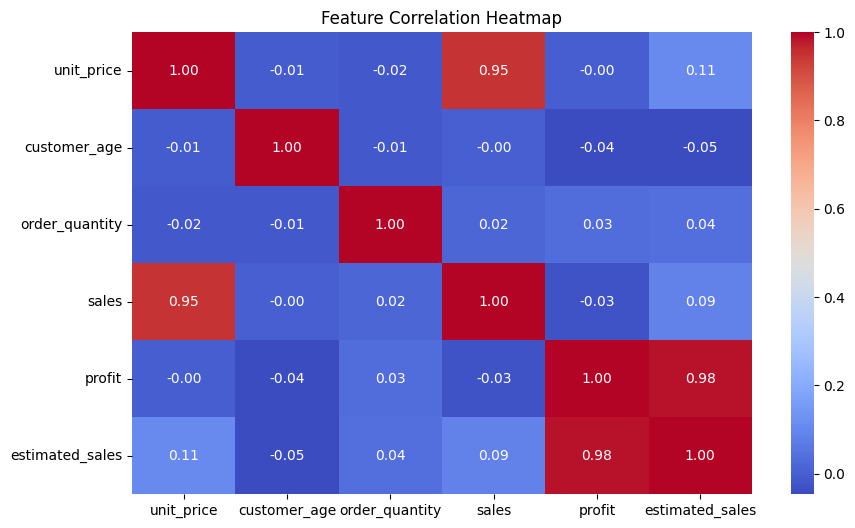

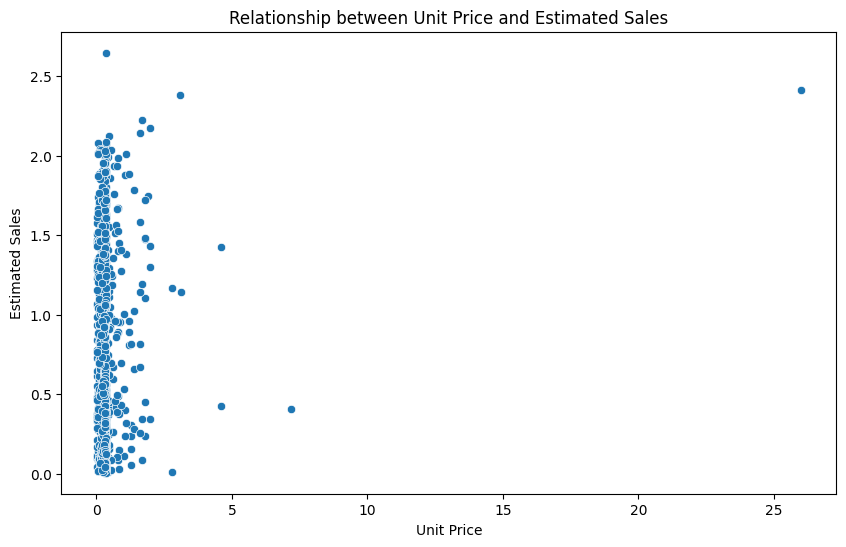

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import numpy as np
import pandas as pd

# Function to calculate correlation
def calculate_correlation(data):
    correlation_price_sales = data[['unit_price', 'estimated_sales']].corr()
    logging.info(f"Correlation between Unit Price and Estimated Sales:\n{correlation_price_sales}")

    correlation_sales_estimated = data[['sales', 'estimated_sales']].corr()
    logging.info(f"Correlation between Sales and Estimated Sales:\n{correlation_sales_estimated}")

    return correlation_price_sales, correlation_sales_estimated

# Function to visualize the relationship between features and estimated sales
def visualize_relationship(data):
    plt.figure(figsize=(10, 6))
    plot_df = pd.DataFrame({
        'unit_price': data['unit_price'].values.ravel(),
        'estimated_sales': data['estimated_sales'].values.ravel()
    })
    sns.scatterplot(x='unit_price', y='estimated_sales', data=plot_df)
    plt.title('Relationship between Unit Price and Estimated Sales')
    plt.xlabel('Unit Price')
    plt.ylabel('Estimated Sales')
    plt.show()

# Visualization functions
def visualize_data_again(data, label_encoders):
    df_temp = data.copy()

    # Handle missing or infinite values
    df_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_temp.dropna(subset=['product_name'], inplace=True)
    df_temp.fillna(0, inplace=True)

    # Check column lengths
    for col in df_temp.columns:
        print(f"{col}: {len(df_temp[col])}")

    # Decode product names
    if 'product_name' in df_temp.columns:
        try:
            df_temp['product_name'] = label_encoders['product_name'].inverse_transform(df_temp['product_name'].astype(int))
        except KeyError as e:
            logging.warning(f"Decoding for 'product_name' failed: {e}")

    # Correlation heatmap for selected features
    selected_features = ['unit_price', 'customer_age', 'order_quantity', 'sales', 'profit', 'estimated_sales']
    logging.info("Creating correlation heatmap...")
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_temp[selected_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # Customer age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['customer_age'], kde=True)
    plt.title('Customer Age Distribution')
    plt.xlabel('Customer Age')
    plt.ylabel('Frequency')
    plt.show()

    # Most wanted products
    plt.figure(figsize=(20, 16))
    sns.countplot(data=df_temp, x='product_name', order=df_temp['product_name'].value_counts().index[:5])
    plt.title('Top 5 Most Wanted Products')
    plt.xlabel('Product Name')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Yearly sales
    yearly_sales = data.groupby('order_date_year')['sales'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=yearly_sales['order_date_year'].values.ravel(),
    y=yearly_sales['sales'].values.ravel())
    plt.title('Yearly Sales')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.show()

    # Important features related to sales prediction
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[selected_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

# Preprocess data and visualize
# dataset, label_encoders, scaler = preprocess_data(dataset)
visualize_data_again(dc, label_encoders)
correlation_price_sales, correlation_sales_estimated = calculate_correlation(dc)
visualize_relationship(dc)


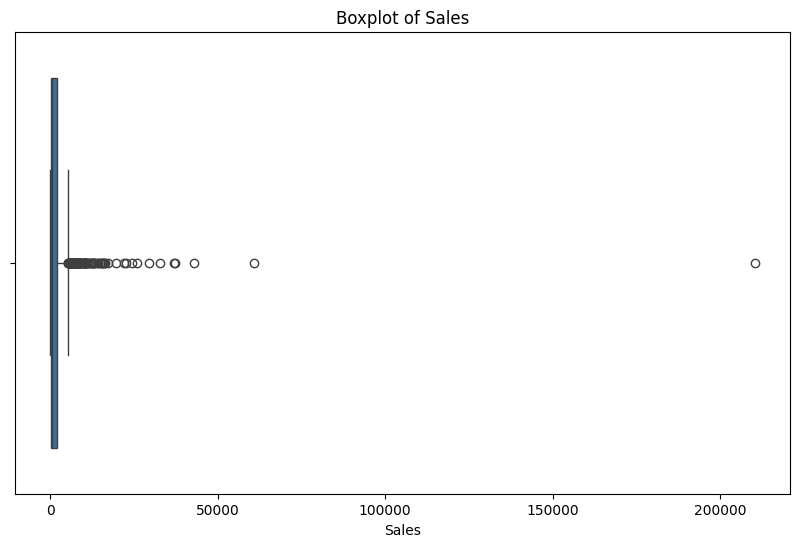

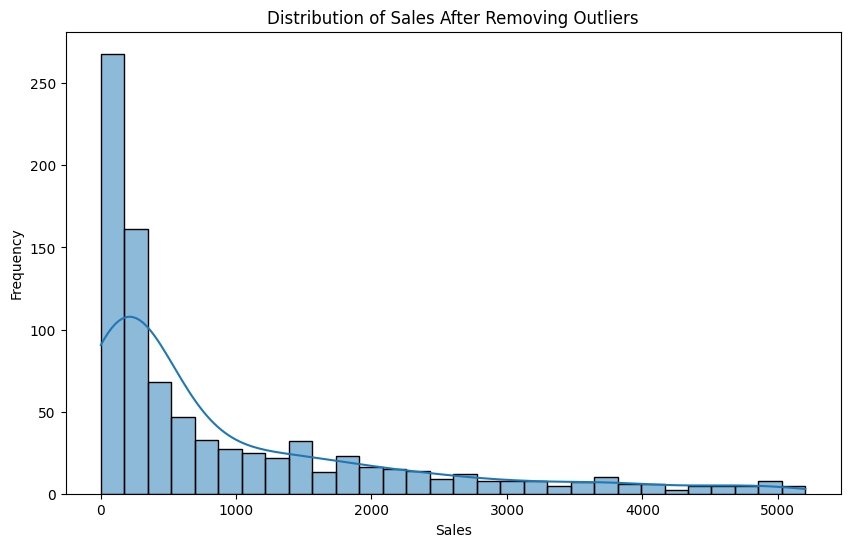

In [ ]:
# Boxplot to visualize outliers in sales data
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['sales'])
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

# Function to remove outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from sales
dataset = remove_outliers(dataset, 'sales')

# Check the updated distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(dataset['sales'], bins=30, kde=True)
plt.title('Distribution of Sales After Removing Outliers')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


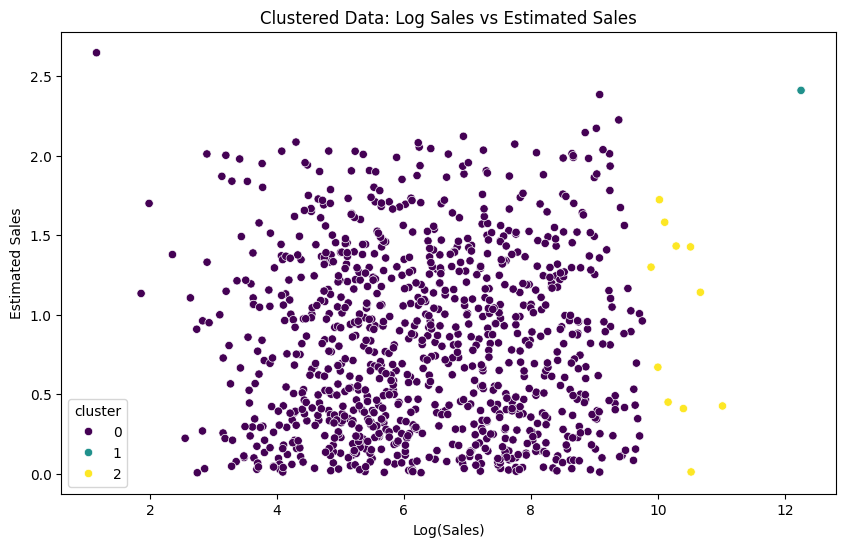

In [ ]:
from sklearn.cluster import KMeans

# KMeans Clustering
def apply_clustering(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[['sales']])
    data['cluster'] = clusters
    return data

# Apply clustering to the dataset without outliers
dataset_clustered = apply_clustering(dc)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_sales', y='estimated_sales', hue='cluster', data=dataset_clustered, palette='viridis')
plt.title('Clustered Data: Log Sales vs Estimated Sales')
plt.xlabel('Log(Sales)')
plt.ylabel('Estimated Sales')
plt.show()

# cluster centers
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(dataset_no_outliers[['log_sales']])
# cluster_centers = kmeans.cluster_centers_
# print("Cluster Centers:\n", cluster_centers)

# # Pair plot to visualize relationships
# sns.pairplot(dataset_clustered, hue='cluster', diag_kind='kde')
# plt.show()

# # Heatmap of correlations within clusters
# for cluster in range(3):
#     cluster_data = dataset_clustered[dataset_clustered['cluster'] == cluster]
#     correlation_matrix = cluster_data.corr()
#     plt.figure(figsize=(10, 6))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#     plt.title(f'Correlation Matrix for Cluster {cluster}')
#     plt.show()

In [ ]:
#original no scaling, no scaling is needed on the original dataset so scaling doesent happen twice when using it for regression model
print(dataset.head())

         city  customer_age  customer_name  customer_segment  discount  \
128105  194.0          76.0          101.0               1.0      0.08   
225930   77.0          65.0          475.0               1.0      0.22   
355800  422.0          80.0          309.0               2.0      0.18   
47215   300.0          45.0          325.0               0.0      0.22   
161123   95.0          85.0          125.0               2.0      0.05   

       order_date  order_id  order_priority  order_quantity  \
128105 2022-09-27     194.0             0.0            20.0   
225930 2022-03-19     988.0             2.0            32.0   
355800 2021-08-28     392.0             4.0             3.0   
47215  2021-03-23     376.0             1.0             4.0   
161123 2022-04-30     686.0             2.0            16.0   

        product_base_margin  ...  profit_margin  order_date_dayofweek  \
128105                 0.49  ...      58.735697                     1   
225930                 0.40  .

In [ ]:

# Hyperparameter tuning function using RandomizedSearchCV
def tune_hyperparameters(model, param_grid, X_train, y_train):
    logging.info(f"Hyperparameter tuning for {model.__class__.__name__} using randomized search...")
    search = RandomizedSearchCV(model, param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)  # Initialize RandomizedSearchCV
    search.fit(X_train, y_train)  # Fit the model with the training data
    best_model = search.best_estimator_  # Get the best estimator
    logging.info(f"Best parameters for {model.__class__.__name__}: {search.best_params_}")  # Log the best parameters
    return best_model

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, param_grid):
    logging.info(f"Training and evaluating {model.__class__.__name__}...")
    tuned_model = tune_hyperparameters(model, param_grid, X_train, y_train)  # Perform hyperparameter tuning
    tuned_model.fit(X_train, y_train)  # Train the model with the training data
    predictions = tuned_model.predict(X_test)  # Make predictions on the test data
    mse = mean_squared_error(y_test, predictions)  # Calculate Mean Squared Error
    r2 = r2_score(y_test, predictions)  # Calculate R-squared
    logging.info(f"Evaluation complete for {model.__class__.__name__} with MSE: {mse}, R2: {r2}")  # Log the evaluation results
    return tuned_model, mse, r2

# Function to validate numeric features
def validate_numeric_features(dataset):
    for column in dataset.select_dtypes(include=[np.number]).columns:
        if not np.issubdtype(dataset[column].dtype, np.number):
            dataset[column] = pd.to_numeric(dataset[column], errors='coerce')
    dataset = dataset.dropna()
    return dataset

# Function to encode categorical features
def encode_categorical_features(dataset):
    label_encoders = {}
    for column in dataset.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])
        label_encoders[column] = le
    return dataset, label_encoders



# X = dataset.drop('estimated_sales', axis=1)
# y = dataset['estimated_sales']

# X, _ = encode_categorical_features(X)  # Encode categorical features before splitting

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Convert datetime columns to numeric (Unix timestamp)
# for col in X_train.select_dtypes(include=['datetime64']).columns:
#     X_train[col] = X_train[col].astype(np.int64) // 10**9
#     X_test[col] = X_test[col].astype(np.int64) // 10**9




In [ ]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import numpy as np


# Linear Regression model
def linear_regression_model(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Placeholder scaler, will be set in GridSearchCV
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', LinearRegression())
    ])

    param_grid = {
        'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
        'poly__degree': [1],  # Polynomial degrees
        'regressor__fit_intercept': [True, False]  # calculate the intercept for this model
    }

    logging.info("Hyperparameter tuning for Linear Regression with polynomial features using grid search...")
    search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
    search.fit(X_train, y_train)

    best_model = search.best_estimator_

    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    logging.info(f"Linear Regression Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    print(f"Linear Regression Training MSE: {train_mse}, Testing MSE: {test_mse}")
    print(f"Linear Regression Training R²: {train_r2}, Testing R²: {test_r2}")

    plt.scatter(y_train, train_predictions, color='blue', alpha=.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    return best_model, train_mse, test_mse, train_r2, test_r2

# Lasso Regression model
def lasso_regression_model(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', Lasso(max_iter=100))  # Increased max_iter to ensure convergence
    ])

    param_grid = {
        'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
        'poly__degree': [1, 2, 3],  # Testing different polynomial degrees
        'regressor__alpha': np.logspace(-4, 1, 4)  # Adjusting alpha values
    }

    search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_

    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    #mse
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

#r2 score
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    logging.info(f"Lasso Regression Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    print(f"Lasso Regression Training MSE: {train_mse}, Testing MSE: {test_mse}")
    print(f"Lasso Regression Training R²: {train_r2}, Testing R²: {test_r2}")

    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Lasso Regression')
    plt.legend()
    plt.show()

    return best_model, train_mse, test_mse, train_r2, test_r2

X = dataset.drop('estimated_sales', axis=1).select_dtypes(exclude=['datetime64'])
y = dataset['estimated_sales']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train and evaluate the models
# linear_model, linear_train_mse, linear_test_mse, linear_train_r2, linear_test_r2 = linear_regression_model(X_train, y_train, X_test, y_test)
# lasso_model, lasso_train_mse, lasso_test_mse, lasso_train_r2, lasso_test_r2 = lasso_regression_model(X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import numpy as np
def gradient_boosting(X_train, y_train, X_test, y_test):


    # Convert datetime columns to numeric (Unix timestamp) before scaling
    # for col in X_train.select_dtypes(include=['datetime64']).columns:
    #     X_train[col] = X_train[col].astype(np.int64) // 10**9
    #     X_test[col] = X_test[col].astype(np.int64) // 10**9


    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Placeholder scaler, will be set in GridSearchCV
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])

    param_grid = {
        'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
        'poly__degree': [1],  # Polynomial degree
        'regressor__n_estimators': [100,200,300,400,500,600,700,800,900,1000,2000,3000,8000,10000,20000,30000,40000,50000],  # Number of boosting stages to be run
        'regressor__learning_rate': [0.000001,0.000000000001,0.001, 0.0001,0.01, 0.05, 0.1, 0.2, 0.3,.9],  # Learning rate shrinks the contribution of each tree
        'regressor__max_depth': [1,2,3,4,5,6,7,8,9,10,20,30, 40,60,70,80,90,100],  # Maximum depth of the individual regression estimators
        'regressor__min_samples_split': [2, 5,7,9,10,12,14,20,30,40,45,50,55,60,65,70,75,80,85,90,100],  # Minimum number of samples required to split an internal node
        'regressor__min_samples_leaf': [1, 2,8,9,10,12,15,20,30,40,50,55,65,70,75,80,90,100],  # Minimum number of samples required to be at a leaf node
        'regressor__subsample': [0.0001,0.1,0.2,.3,.4,.5,.6,0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the individual base learners
    }

    # Hyperparameter tuning with GridSearchCV
    # search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

    # search = RandomizedSearchCV(pipeline, param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
    # search.fit(X_train, y_train)

    # # Get the best model from the hyperparameter search
    # best_model = search.best_estimator_
    # print(f"Best parameters for Gradient Boosting Regressor: {search.best_params_}")

    # Perform cross-validation and get the mean score
    # cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"Gradient Boosting Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    print(f"Gradient Boosting Training MSE: {train_mse}, Testing MSE: {test_mse}")
    print(f"Gradient Boosting Training R²: {train_r2}, Testing R²: {test_r2}")

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Gradient Boosting')
    plt.legend()
    plt.show()

    print(f"Gradient Boosting Training MSE: {train_mse}, R²: {train_r2}")
    print(f"Gradient Boosting Testing MSE: {test_mse}, R²: {test_r2}")
    print(f"Gradient Boosting Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    return best_model, train_mse, test_mse, train_r2, test_r2

# gradient_boosting(X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import numpy as np


def neural_network(X_train, y_train, X_test, y_test):


    # # Convert datetime columns to numeric (Unix timestamp) before scaling
    # for col in X_train.select_dtypes(include=['datetime64']).columns:
    #     X_train[col] = X_train[col].astype(np.int64) // 10**9
    #     X_test[col] = X_test[col].astype(np.int64) // 10**9


    #pipleine
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # placeholder scaler, will be set in GridSearchCV
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', MLPRegressor(max_iter=10, random_state=42))  # Define the neural network regressor
    ])

    # Define the hyperparameter grid for RandomizedSearchCV
    param_grid = {
        'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
        'poly__degree': [1],  # Polynomial degree
        'regressor__hidden_layer_sizes': [(50,50,50), (50,100,50),(500,900,500), (1000)],  # Different layer sizes
        'regressor__activation': ['tanh', 'relu'],  # Activation functions
        'regressor__solver': ['sgd', 'adam'],  # Optimizers
        'regressor__alpha': [0.0001,.01,.1, 0.05],  # Regularization parameter
        # 'regressor__learning_rate': ['constant','adaptive'],  # Learning rate schedule
    }

    # # Hyperparameter tuning with RandomizedSearchCV
    logging.info(f"Hyperparameter tuning for MLPRegressor with polynomial features using randomized search...")
    search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
    search.fit(X_train, y_train)

    # search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # search.fit(X_train, y_train)


    # Get the best model from the hyperparameter search
    best_model = search.best_estimator_
    logging.info(f"Best parameters for MLPRegressor: {search.best_params_}")

    # Train the best model on the entire training set
    best_model.fit(X_train, y_train)


        # Cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    logging.info(f"Neural Network Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")


    # Make predictions on the test set
    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    print(f"Neural Network Training MSE: {train_mse}, R²: {train_r2}")
    print(f"Neural Network Testing MSE: {test_mse}, R²: {test_r2}")
    print(f"Neural Network Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Neural Network')
    plt.legend()
    plt.show()



    return best_model, train_mse, test_mse, train_r2, test_r2

# neural_network(X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import logging

def ridge_regression(X_train, y_train, X_test, y_test):

  pipeline = Pipeline([
      ('scaler', StandardScaler()),  # Placeholder scaler, will be set in GridSearchCV
      ('poly', PolynomialFeatures()),  # Add polynomial features
      ('regressor', Ridge())
  ])

  param_grid = {
      'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
      'poly__degree': [1, 2],  # Polynomial degree
      'regressor__alpha': np.logspace(-4, 4, 7),  # Regularization strength
      'regressor__fit_intercept': [True, False]  # Whether to calculate the intercept for this model
  }


  logging.info("Hyperparameter tuning for Ridge Regression with polynomial features using grid search...")
  search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
  search.fit(X_train, y_train)

  best_model = search.best_estimator_

  train_predictions = best_model.predict(X_train)
  test_predictions = best_model.predict(X_test)

  # Cross-validation
  cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  mean_cv_score = -np.mean(cv_scores)
  std_cv_score = np.std(cv_scores)
  logging.info(f"Ridge Regression Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")


  # Calculate performance metrics
  train_mse = mean_squared_error(y_train, train_predictions)
  test_mse = mean_squared_error(y_test, test_predictions)
  train_r2 = r2_score(y_train, train_predictions)
  test_r2 = r2_score(y_test, test_predictions)

  logging.info(f"Ridge Regression Training MSE: {train_mse}, R²: {train_r2}")
  logging.info(f"Ridge Regression Testing MSE: {test_mse}, R²: {test_r2}")

  # Plotting predictions vs actual values
  plt.figure(figsize=(10, 6))
  plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
  plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
  plt.xlabel('True Sales')
  plt.ylabel('Predicted Sales')
  plt.title('Ridge Regression with Polynomial Features')
  plt.legend()
  plt.show()

  print(f"Ridge Regression Training MSE: {train_mse}, R²: {train_r2}")
  print(f"Ridge Regression Testing MSE: {test_mse}, R²: {test_r2}")

  return best_model, train_mse, test_mse, train_r2, test_r2

# ridge_regression(X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import numpy as np



def decision_tree(X_train, y_train, X_test, y_test):

  # # Convert datetime columns to numeric (Unix timestamp) before scaling
  # for col in X_train.select_dtypes(include=['datetime64']).columns:
  #     X_train[col] = X_train[col].astype(np.int64) // 10**9
  #     X_test[col] = X_test[col].astype(np.int64) // 10**9

# Define the DecisionTreeRegressor pipeline with polynomial features
  pipeline = Pipeline([
      ('scaler', StandardScaler()),  # Placeholder scaler, will be set in GridSearchCV
      ('poly', PolynomialFeatures()),  # Add polynomial features
      ('regressor', DecisionTreeRegressor())
  ])


# Define the hyperparameter grid for RandomizedSearchCV
  param_grid = {
      'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
      'poly__degree': [1],  # Polynomial degree
      'regressor__criterion': ['mse', 'friedman_mse', 'mae'],  # Splitting criterion
      'regressor__splitter': ['best', 'random'],  # Splitter strategy
      'regressor__max_depth': [None, 10, 20],  # Maximum depth of the tree
      'regressor__min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
      'regressor__min_samples_leaf': [1, 5],  # Minimum number of samples required to be at a leaf node
      # 'regressor__max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
      'regressor__max_leaf_nodes': [None, 10, 20]  # Maximum number of leaf nodes
  }


  # # Hyperparameter tuning with RandomizedSearchCV
  # logging.info(f"Hyperparameter tuning for DecisionTreeRegressor with polynomial features using randomized search...")
  # search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
  # search.fit(X_train, y_train)

  # # Get the best model from the hyperparameter search
  # best_model = search.best_estimator_
  # logging.info(f"Best parameters for DecisionTreeRegressor: {search.best_params_}")

  logging.info("Hyperparameter tuning for DecisionTreeRegressor with polynomial features using grid search...")
  search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
  search.fit(X_train, y_train)

  best_model = search.best_estimator_

  train_predictions = best_model.predict(X_train)
  test_predictions = best_model.predict(X_test)

  train_mse = mean_squared_error(y_train, train_predictions)
  test_mse = mean_squared_error(y_test, test_predictions)
  train_r2 = r2_score(y_train, train_predictions)
  test_r2 = r2_score(y_test, test_predictions)

  logging.info(f"Decision Tree Training MSE: {train_mse}, R²: {train_r2}")
  logging.info(f"Decision Tree Testing MSE: {test_mse}, R²: {test_r2}")

  plt.figure(figsize=(10, 6))
  plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
  plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
  plt.xlabel('True Sales')
  plt.ylabel('Predicted Sales')
  plt.title('Decision Tree')
  plt.legend()
  plt.show()

  # Cross-validation
  cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  mean_cv_score = -np.mean(cv_scores)
  std_cv_score = np.std(cv_scores)
  logging.info(f"Decision Tree Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

  print(f"Decision Tree Training MSE: {train_mse}, R²: {train_r2}")
  print(f"Decision Tree Testing MSE: {test_mse}, R²: {test_r2}")
  print(f"Decision Tree Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

  return best_model, train_mse, test_mse, train_r2, test_r2

# decision_tree(X_train, y_train, X_test, y_test)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import numpy as np

def random_forest(X_train, y_train, X_test, y_test):
    """
    Function to train and evaluate a Random Forest Regressor model with polynomial features and hyperparameter tuning.
    """
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Placeholder scaler, will be set in GridSearchCV
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', RandomForestRegressor())
    ])

    param_grid = {
        'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
        'poly__degree': [1],  # Polynomial degree
        'regressor__n_estimators': [100,200,300, 400,500, 600,700,800,900],  # Number of trees in the forest
        'regressor__criterion': ['squared_error', 'absolute_error', 'poisson'],  # Valid options for criterion
        'regressor__max_depth': [None, 10, 20,30,40,50,60,70],  # Maximum depth of the tree
        'regressor__min_samples_split': [2, 5,7,8,9],  # Minimum number of samples required to split an internal node
        'regressor__min_samples_leaf': [1,5,9,10,12,14,16,19,24],  # Minimum number of samples required to be at a leaf node
        # 'regressor__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
        'regressor__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
    }

    logging.info("Hyperparameter tuning for RandomForestRegressor with polynomial features using grid search...")
    search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
    search.fit(X_train, y_train)

    best_model = search.best_estimator_

    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    logging.info(f"Random Forest Training MSE: {train_mse}, R²: {train_r2}")
    logging.info(f"Random Forest Testing MSE: {test_mse}, R²: {test_r2}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Random Forest')
    plt.legend()
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    logging.info(f"Random Forest Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    print(f"Random Forest Training MSE: {train_mse}, R²: {train_r2}")
    print(f"Random Forest Testing MSE: {test_mse}, R²: {test_r2}")
    print(f"Random Forest Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    return best_model, train_mse, test_mse, train_r2, test_r2


# random_forest(X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.linear_model import ElasticNet

def elastic_net(X_train, y_train, X_test, y_test):
    """
    Function to create, train and evaluate an ElasticNet regression model.
    """

    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Placeholder scaler, will be set in GridSearchCV
        ('poly', PolynomialFeatures()),  # Add polynomial features
        ('regressor', ElasticNet(random_state=42, max_iter=10))  # Increased max_iter to ensure convergence
    ])

    param_grid = {
        'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
        'poly__degree': [1, 2],  # Adjust polynomial degree
        'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }


    # logging.info(f"Hyperparameter tuning for ElasticNet with polynomial features using randomized search...")
    # search = RandomizedSearchCV(pipeline, param_grid, n_iter=50, cv=3,
    # scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    # search.fit(X_train, y_train)

    # # Get the best model from the hyperparameter search
    # best_model = search.best_estimator_

    logging.info("Hyperparameter tuning for ElasticNet with polynomial features using grid search...")
    search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=50, random_state=42)
    search.fit(X_train, y_train)

    best_model = search.best_estimator_

    # Make predictions
    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    logging.info(f"ElasticNet Model Training MSE: {train_mse}, R²: {train_r2}")
    logging.info(f"ElasticNet Model Testing MSE: {test_mse}, R²: {test_r2}")

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Elastic Net')
    plt.legend()
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    logging.info(f"ElasticNet Model Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")

    print(f"Elastic Net Training MSE: {train_mse}, R²: {train_r2}")
    print(f"Elastic Net Testing MSE: {test_mse}, R²: {test_r2}")
    print(f"Elastic Net Cross-validated MSE: {mean_cv_score:.2f} (+/- {std_cv_score:.2f})")


    return best_model, train_mse, test_mse, train_r2, test_r2

# elastic_net(X_train, y_train, X_test, y_test)

In [ ]:
!pip install scikit-learn


In [ ]:
highest_sales = dataset.nlargest(5, 'estimated_sales')
print("Top 5 Highest Estimated Sales:")
print(highest_sales)

lowest_sales = dataset.nsmallest(5, 'estimated_sales')
print("Top 5 Lowest Estimated Sales:")
print(lowest_sales)


Top 5 Highest Estimated Sales:
         city  customer_age  customer_name  customer_segment  discount  \
116557  214.0          46.0          527.0               0.0      0.00   
11978     9.0          42.0          311.0               0.0      0.21   
266738   97.0          83.0           50.0               0.0      0.16   
126533   37.0          48.0          472.0               3.0      0.09   
150934  556.0          46.0          323.0               0.0      0.17   

       order_date  order_id  order_priority  order_quantity  \
116557 2021-10-12     857.0             2.0             1.0   
11978  2020-07-15      89.0             2.0             5.0   
266738 2022-08-05      77.0             2.0            42.0   
126533 2019-08-11     991.0             0.0             5.0   
150934 2021-08-07     847.0             4.0            13.0   

        product_base_margin  ...  profit_margin  order_date_dayofweek  \
116557                 0.52  ...   11865.361425                     1   

In [ ]:
!pip install dill


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
#saving the esenmble model permanetly since its the best result out of the other trials

import dill

with open('/content/drive/MyDrive/ensemble_function.pkl', 'wb') as f:
    dill.dump(ensemble, f)

with open('/content/drive/MyDrive/ensemble_function.pkl', 'rb') as f:
    ensemble = dill.load(f)

drive.mount('/content/drive')

def ensemble(x):
    return x * 2  # Example function

# Save the function
with open('/content/drive/MyDrive/ensemble_function.pkl', 'wb') as f:
    dill.dump(ensemble, f)

# Load the function
with open('/content/drive/MyDrive/ensemble_function.pkl', 'rb') as f:
    ensemble = dill.load(f)

# Use the function
result = ensemble(5)
print(result)  # Output should be 10


ModuleNotFoundError: No module named 'dill'

In [ ]:
import joblib

# Save the ensemble model to a file
joblib.dump(ensemble, 'ensemble_model.pkl')
print("Model saved to ensemble_model.pkl")

# Load the ensemble model from the file
loaded_ensemble = joblib.load('ensemble_model.pkl')
print("Model loaded from ensemble_model.pkl")



# Print the type of the ensemble model before saving
print(f"Type of the ensemble model before saving: {type(ensemble)}")

# Save the ensemble model to a file
joblib.dump(ensemble, 'ensemble_model.pkl')
print("Model saved to ensemble_model.pkl")

# Load the ensemble model from the file
loaded_ensemble = joblib.load('ensemble_model.pkl')
print("Model loaded from ensemble_model.pkl")

# Print the type of the loaded model
print(f"Type of the loaded model: {type(loaded_ensemble)}")




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+05, tolerance: 4.601e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.00532e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.142e+05, tolerance: 4.601e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

Root Mean Squared Error: 125.22


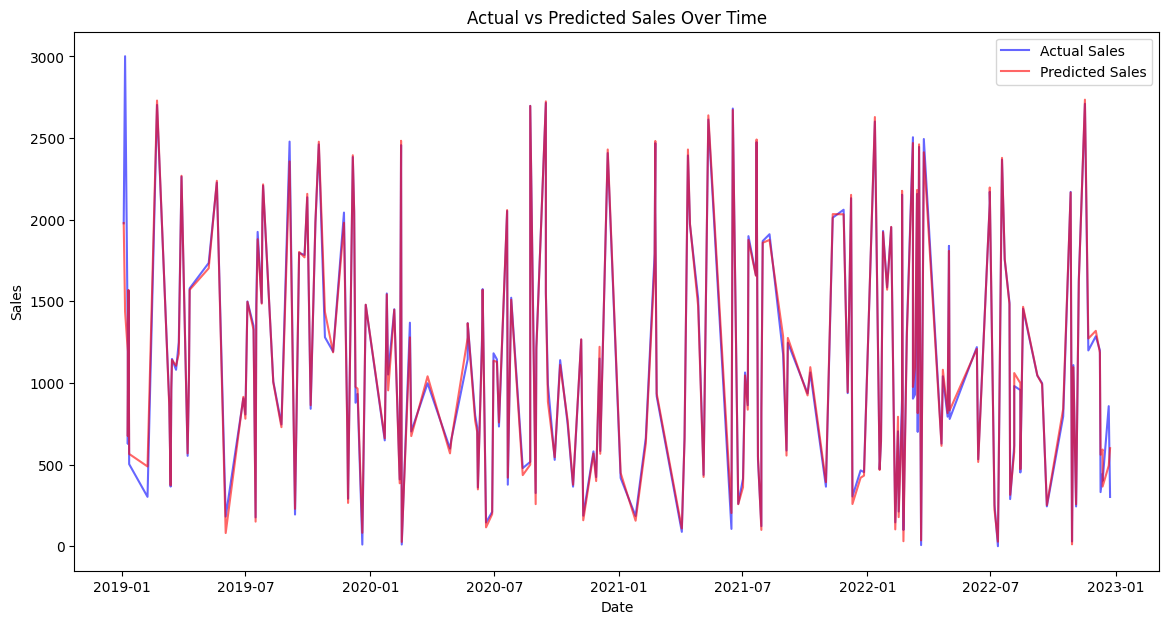

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Preprocess and split the dataset
X = dataset.drop('estimated_sales', axis=1)
y = dataset['estimated_sales']

X, _ = encode_categorical_features(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert datetime columns to numeric (Unix timestamp)
# Make sure to do this for both X_train and X_test
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype(np.int64) // 10**9
    X_test[col] = X_test[col].astype(np.int64) // 10**9

# Define the base regressors
base_regressors = [
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor()),
    ('gbr', GradientBoostingRegressor()),
    ('randomforest', RandomForestRegressor()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('elasticnet', ElasticNet()),
    ('mlp', MLPRegressor()),
    ('decisiontree', DecisionTreeRegressor())

]

# Define the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=LinearRegression()
)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse:.2f}')


# Create a DataFrame for plotting
results = pd.DataFrame({
    'date': dataset.loc[X_test.index, 'order_date'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='date')

# Plot the actual vs predicted sales over time
plt.figure(figsize=(14, 7))
plt.plot(results['date'], results['Actual'], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(results['date'], results['Predicted'], label='Predicted Sales', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Over Time')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.144e+05, tolerance: 4.601e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.00532e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.142e+05, tolerance: 4.601e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

Root Mean Squared Error: 126.43


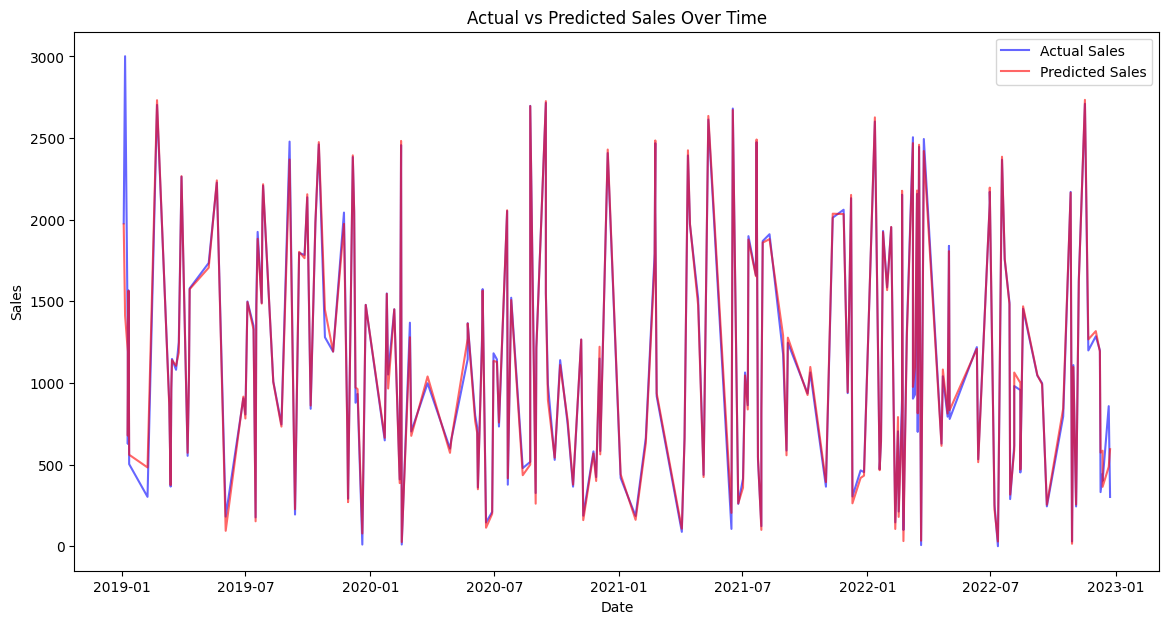

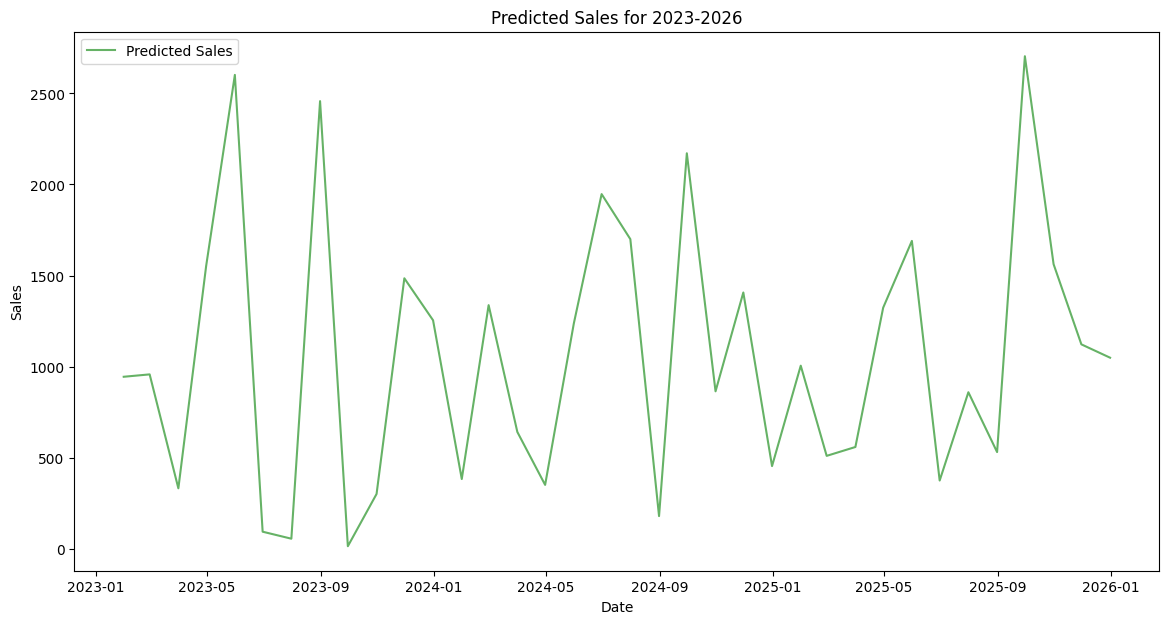

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = dataset.copy()  #

# Define the target and feature columns
X = df.drop('estimated_sales', axis=1)
y = df['estimated_sales']

def encode_categorical_features(df):
    df_encoded = pd.get_dummies(df, drop_first=True)
    return df_encoded, df.columns[df.dtypes == 'object']

X, _ = encode_categorical_features(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert datetime columns to numeric (Unix timestamp)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype(np.int64) // 10**9
    X_test[col] = X_test[col].astype(np.int64) // 10**9

#  base regressors
base_regressors = [
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor()),
    ('gbr', GradientBoostingRegressor()),
    ('randomforest', RandomForestRegressor()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('elasticnet', ElasticNet()),
    ('mlp', MLPRegressor())
]

# Define the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=LinearRegression()
)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse:.2f}')

# Create a DataFrame for plotting
results = pd.DataFrame({
    'date': df.loc[X_test.index, 'order_date'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='date')

# Plot the actual vs predicted sales over time
plt.figure(figsize=(14, 7))
plt.plot(results['date'], results['Actual'], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(results['date'], results['Predicted'], label='Predicted Sales', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Over Time')
plt.legend()
plt.show()


future_X = X_train.copy()

# Predict future sales
future_predictions = stacking_regressor.predict(future_X)

# Generate future dates for 2023, 2024, 2025 end of 2025
future_dates = pd.date_range(start='2023-01-01', end='2025-12-31', freq='M')

# Create a DataFrame for future predictions
future_results = pd.DataFrame({
    'date': future_dates,
    'Predicted': future_predictions[:len(future_dates)]
})

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(future_results['date'], future_results['Predicted'], label='Predicted Sales', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales for 2023-2026')
plt.legend()
plt.show()


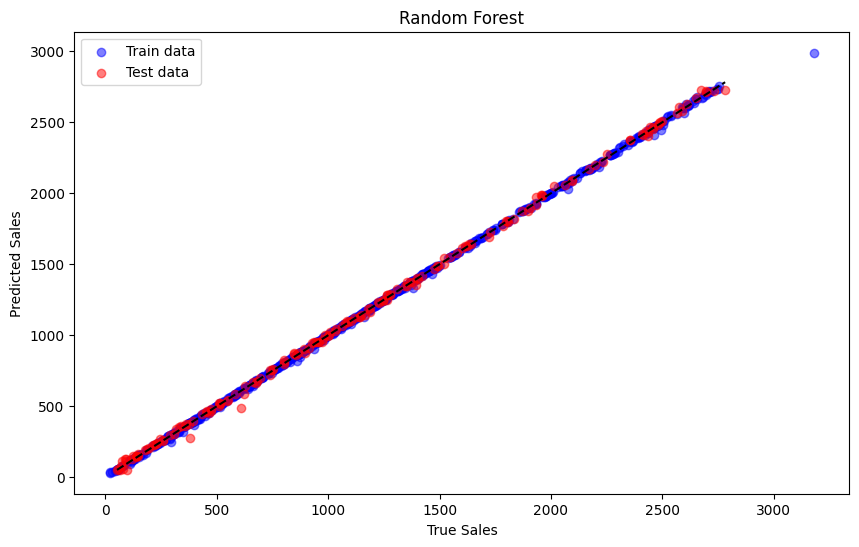

Random Forest Training MSE: 116.79235285359741, R²: 0.9997785220303747
Random Forest Testing MSE: 422.1751271508969, R²: 0.9993103597859397
Random Forest Cross-validated MSE: 968.32 (+/- 986.96)
Gradient Boosting Model Cross-validated MSE: 1500.59 (+/- 696.61)
Gradient Boosting Training MSE: 423.11296808273687, Testing MSE: 1099.1822946247576
Gradient Boosting Training R²: 0.999197634101861, Testing R²: 0.998204441085689


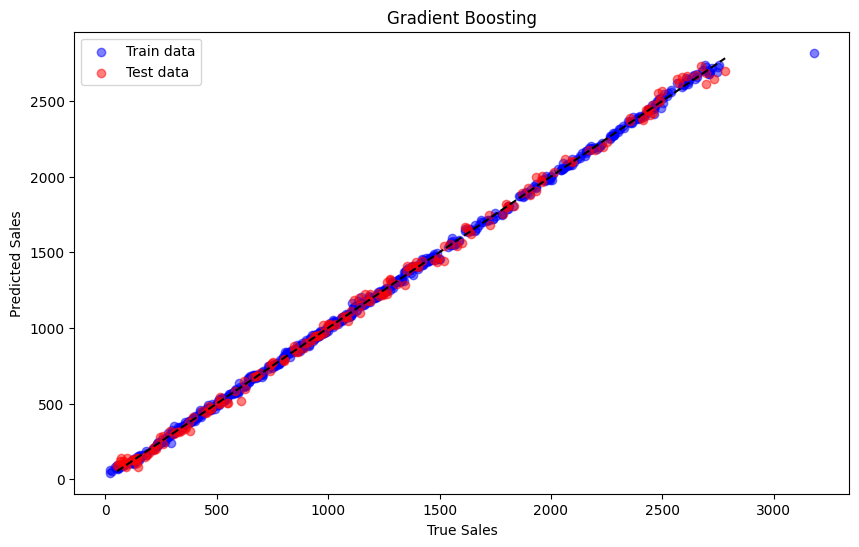

Gradient Boosting Training MSE: 423.11296808273687, R²: 0.999197634101861
Gradient Boosting Testing MSE: 1099.1822946247576, R²: 0.998204441085689
Gradient Boosting Cross-validated MSE: 1500.59 (+/- 696.61)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python

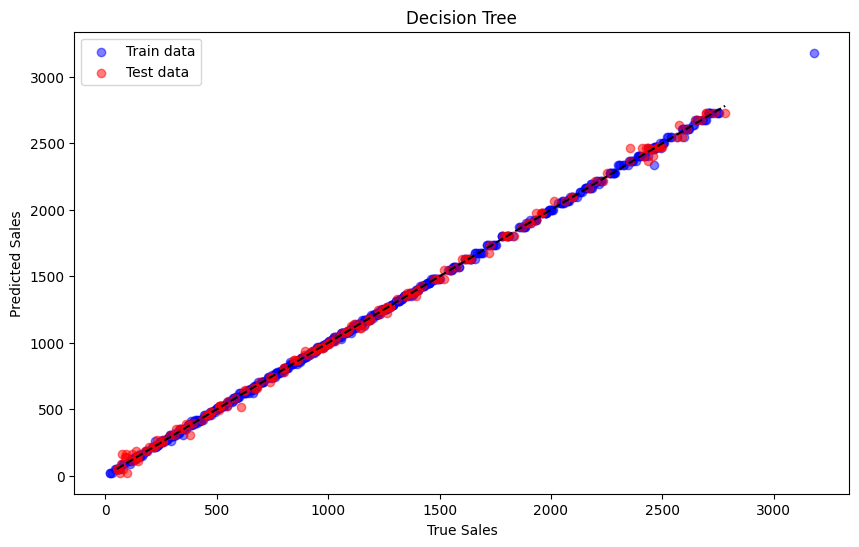

Decision Tree Training MSE: 121.79868930994488, R²: 0.9997690283160472
Decision Tree Testing MSE: 704.2366031821466, R²: 0.9988496009107757
Decision Tree Cross-validated MSE: 1302.38 (+/- 923.74)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python

Neural Network Training MSE: 951.6560332385201, R²: 0.9981953369302557
Neural Network Testing MSE: 11892.846908135663, R²: 0.9805725516259977
Neural Network Cross-validated MSE: 19792.59 (+/- 7645.97)


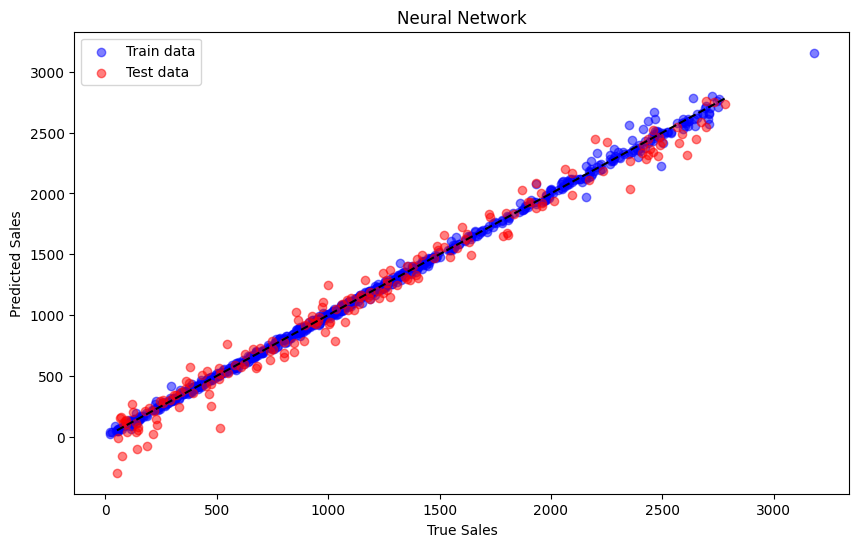

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression Training MSE: 1.2154432126440646e-24, Testing MSE: 1.1103425500264719e-24
Linear Regression Training R²: 1.0, Testing R²: 1.0


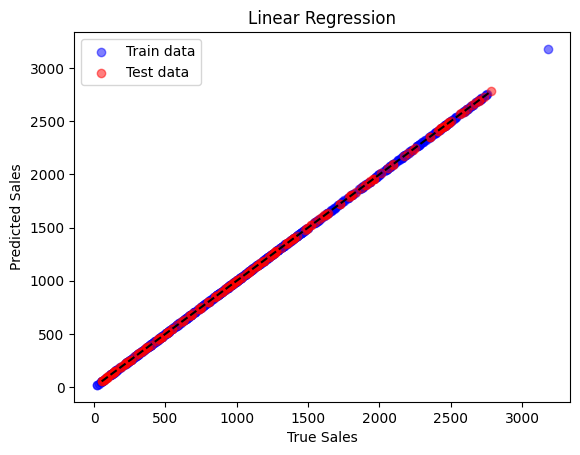

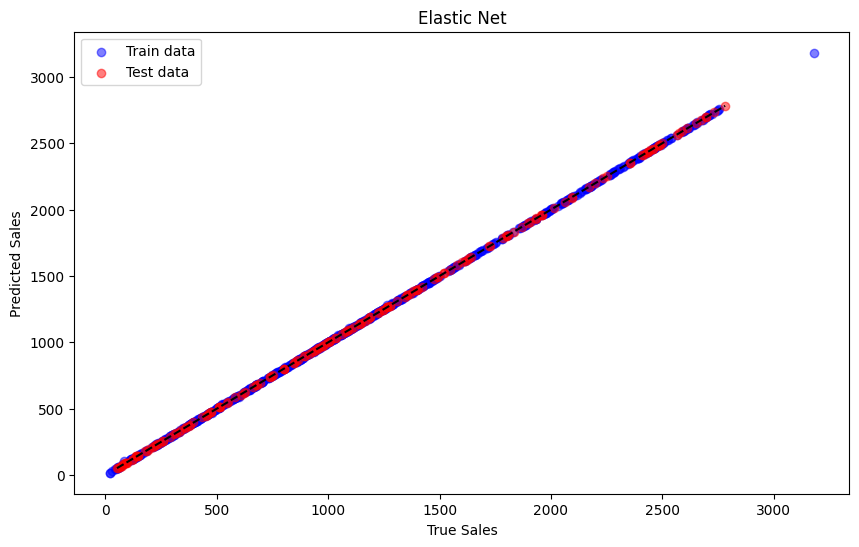

Elastic Net Training MSE: 4.686189984856464, R²: 0.9999911133921205
Elastic Net Testing MSE: 2.6315806283257706, R²: 0.9999957012061793
Elastic Net Cross-validated MSE: 5.80 (+/- 3.08)
Lasso Regression Training MSE: 0.05990009847235142, Testing MSE: 0.07043816734489286
Lasso Regression Training R²: 0.9999998864090682, Testing R²: 0.9999998849363932


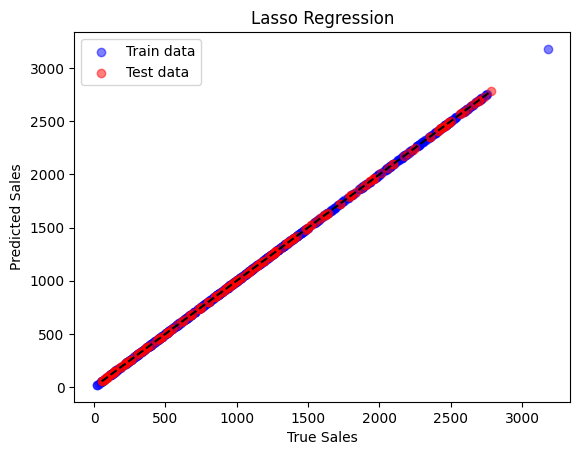

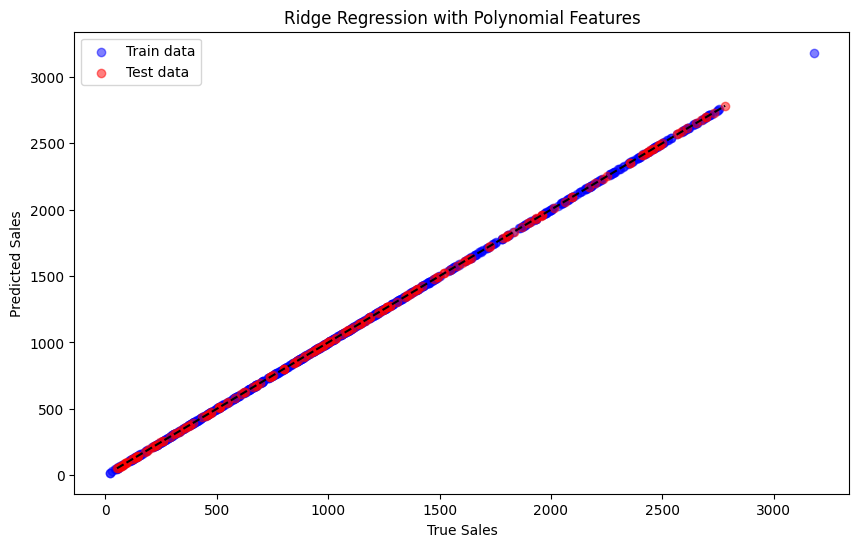

Ridge Regression Training MSE: 1.1381866189644831e-08, R²: 0.9999999999999785
Ridge Regression Testing MSE: 1.3885155423377576e-08, R²: 0.9999999999999774


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

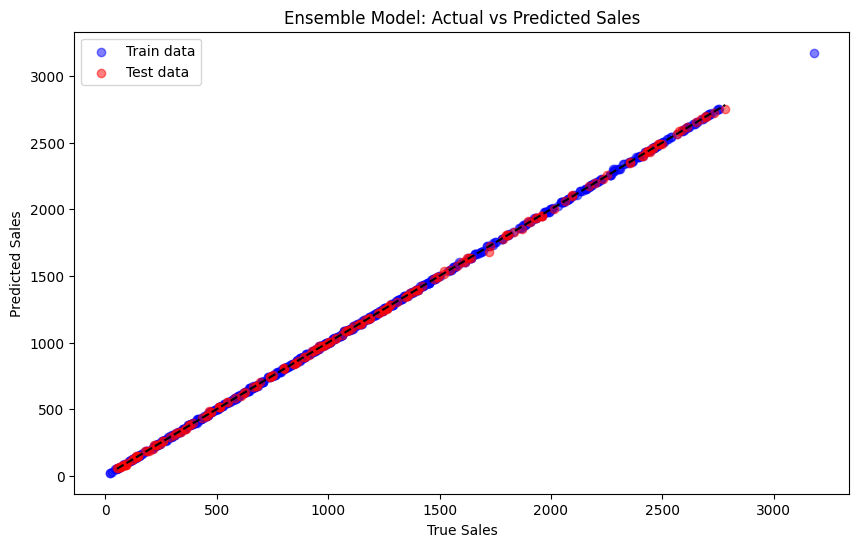

Ensemble Model Training MSE: 20.984008550257567, R²: 0.9999602071925536
Ensemble Model Testing MSE: 54.31190110669228, R²: 0.9999112793040225


In [ ]:
from sklearn.ensemble import StackingRegressor
import logging
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline # Import the make_pipeline function

import sklearn # Import sklearn for machine learning models
import numpy as np # Import numpy for numerical operations
import pandas as pd # Import pandas for data manipulation
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import logging


# Ensemble function
def ensemble_model30(X_train, y_train, X_test, y_test):
    """
    Function to create and evaluate an ensemble model using stacking of multiple regression models.
    """

    # Convert datetime columns to numeric (Unix timestamp)
    for col in X_train.select_dtypes(include=['datetime64']).columns:
        X_train[col] = X_train[col].astype(np.int64) // 10**9
        X_test[col] = X_test[col].astype(np.int64) // 10**9

    # Define base models
    base_models = [
        ('random_forest', random_forest(X_train, y_train, X_test, y_test)[0]),
         ('gradient_boosting', gradient_boosting(X_train, y_train, X_test, y_test)[0]),
        ('decision_tree', decision_tree(X_train, y_train, X_test, y_test)[0]),
        ('neural_network', neural_network(X_train, y_train, X_test, y_test)[0]),
        ('linear_regression', linear_regression_model(X_train, y_train, X_test, y_test)[0]),
        ('elastic_net', elastic_net(X_train, y_train, X_test, y_test)[0]),
        ('lasso_regression', lasso_regression_model(X_train, y_train, X_test, y_test)[0]),
        ('ridge_regression', ridge_regression(X_train, y_train, X_test, y_test)[0])

    ]

    # Define stacking regressor
    ensemble = StackingRegressor(
        estimators=base_models,
        final_estimator=GradientBoostingRegressor(),  # Final estimator
        passthrough=True
    )

    # Train the ensemble model
    logging.info("Training the ensemble model...")
    ensemble.fit(X_train, y_train)

    # Make predictions
    train_predictions = ensemble.predict(X_train)
    test_predictions = ensemble.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    logging.info(f"Ensemble Model Training MSE: {train_mse}, R²: {train_r2}")
    logging.info(f"Ensemble Model Testing MSE: {test_mse}, R²: {test_r2}")

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Ensemble Model: Actual vs Predicted Sales')
    plt.legend()
    plt.show()

    return ensemble, train_mse, test_mse, train_r2, test_r2



# Assuming the dataset has already been preprocessed and loaded
# Preprocess and split the dataset
X = dataset.drop('estimated_sales', axis=1)
y = dataset['estimated_sales']

X, _ = encode_categorical_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ensemble22, train_mse, test_mse, train_r2, test_r2 = ensemble_model(X_train, y_train, X_test, y_test)

# Print final results
print(f"Ensemble Model Training MSE: {train_mse}, R²: {train_r2}")
print(f"Ensemble Model Testing MSE: {test_mse}, R²: {test_r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+04, tolerance: 3.649e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to 

Lasso Regression Training MSE: 0.43996212781939187, Testing MSE: 3.3189848872092593
Lasso Regression Training R²: 0.9999992245200182, Testing R²: 0.9999933602493725


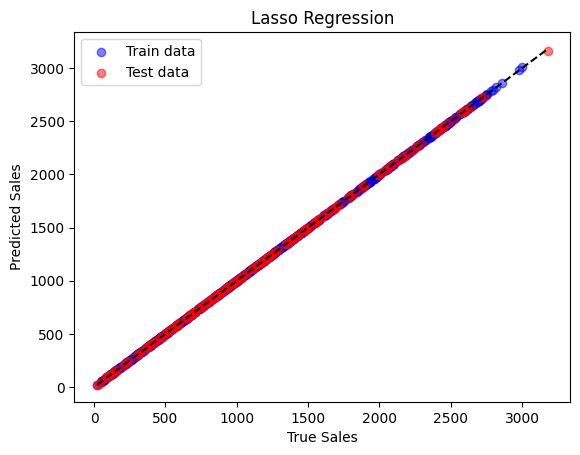

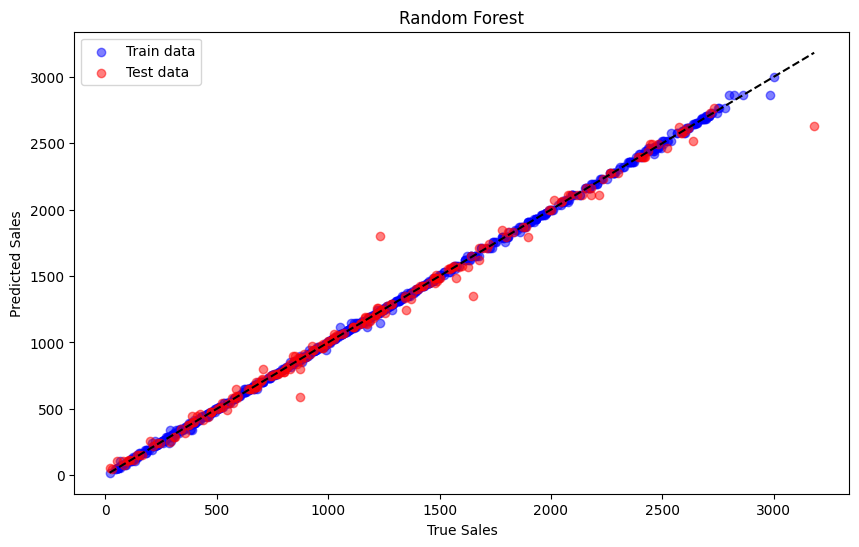

Random Forest Training MSE: 143.92488263419108, R²: 0.9997463171070875
Random Forest Testing MSE: 4838.829280789436, R²: 0.9903197450890809
Random Forest Cross-validated MSE: 5968.52 (+/- 8215.10)
Gradient Boosting Model Cross-validated MSE: 7255.29 (+/- 9358.11)
Gradient Boosting Training MSE: 5574.90820030592, Testing MSE: 4134.826245087461
Gradient Boosting Training R²: 0.9901736321469201, Testing R²: 0.9917281289042967


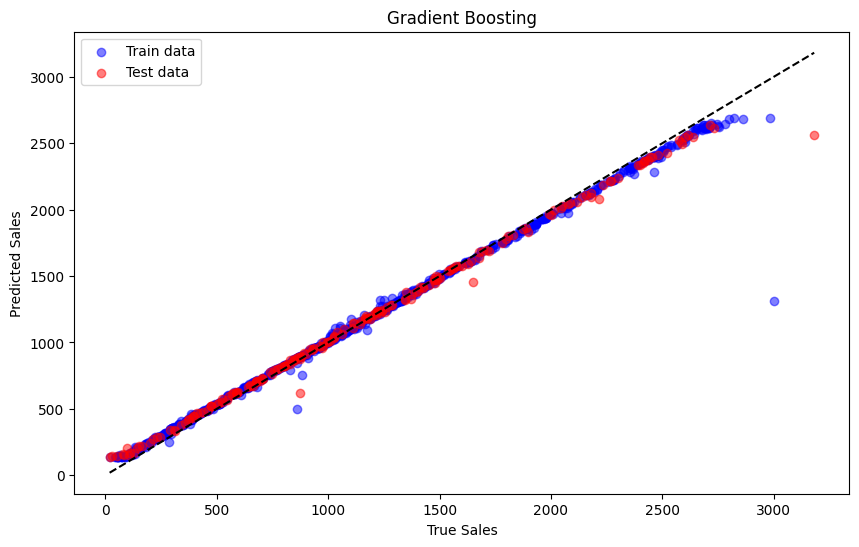

Gradient Boosting Training MSE: 5574.90820030592, R²: 0.9901736321469201
Gradient Boosting Testing MSE: 4134.826245087461, R²: 0.9917281289042967
Gradient Boosting Cross-validated MSE: 7255.29 (+/- 9358.11)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pytho

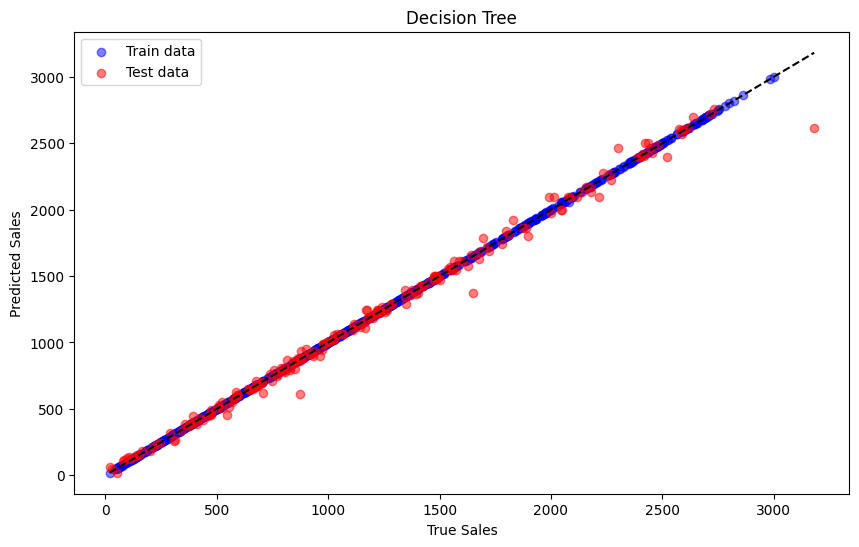

Decision Tree Training MSE: 0.8602539747487746, R²: 0.9999984837109959
Decision Tree Testing MSE: 3586.6020339801944, R²: 0.9928248714847645
Decision Tree Cross-validated MSE: 6506.27 (+/- 7915.30)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python

Neural Network Training MSE: 2345.034756395745, R²: 0.9958666271592889
Neural Network Testing MSE: 10289.536709817145, R²: 0.9794154055689193
Neural Network Cross-validated MSE: 27942.76 (+/- 15858.27)


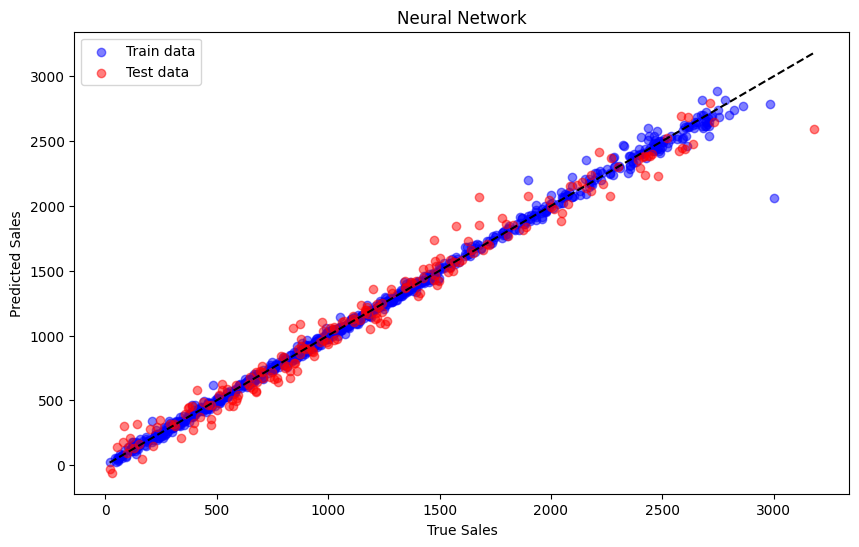

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression Training MSE: 5.951888742719886e-23, Testing MSE: 7.354423678158046e-23
Linear Regression Training R²: 1.0, Testing R²: 1.0


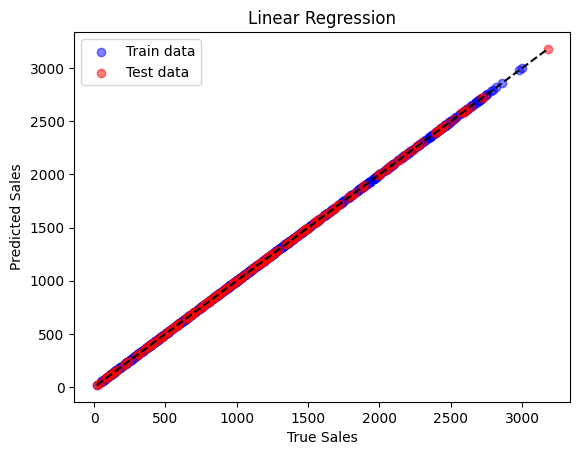

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+06, tolerance: 4.499e+04
  model = cd_fast.enet_coordinate_descent(


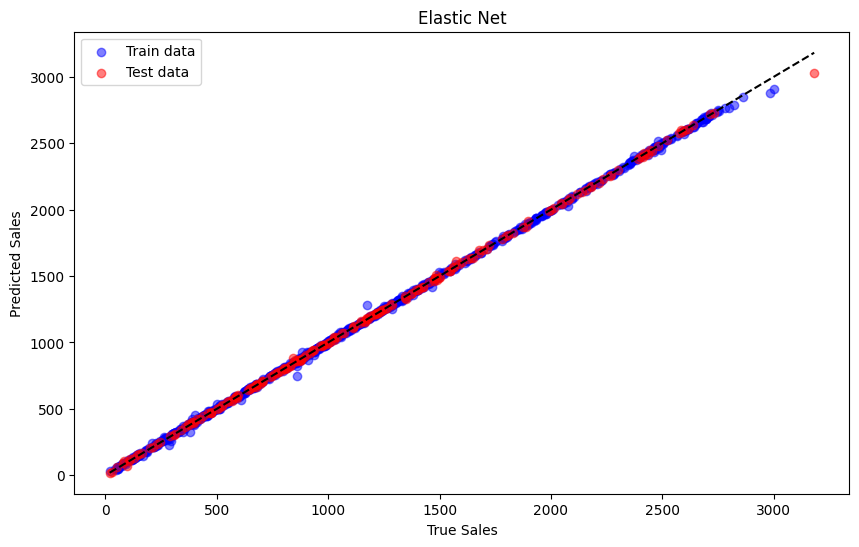

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.591e+05, tolerance: 3.649e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.296e+05, tolerance: 3.594e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.598e+05, tolerance: 3.619e

Elastic Net Training MSE: 155.8785344816624, R²: 0.9997252475260253
Elastic Net Testing MSE: 203.17061015324072, R²: 0.999593549765333
Elastic Net Cross-validated MSE: 169.52 (+/- 114.63)


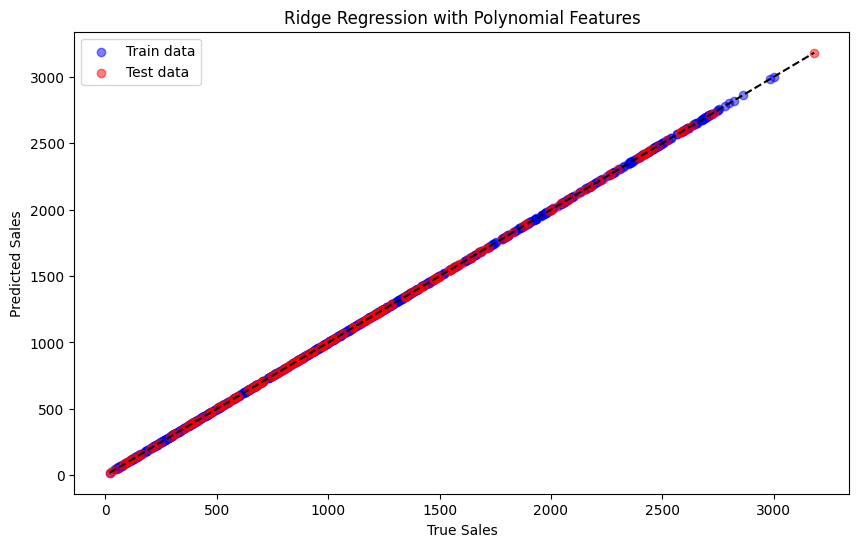

Ridge Regression Training MSE: 1.1725490696551688e-08, R²: 0.9999999999999793
Ridge Regression Testing MSE: 2.3892669330129392e-08, R²: 0.9999999999999521


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+06, tolerance: 4.499e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+04, tolerance: 3.649e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

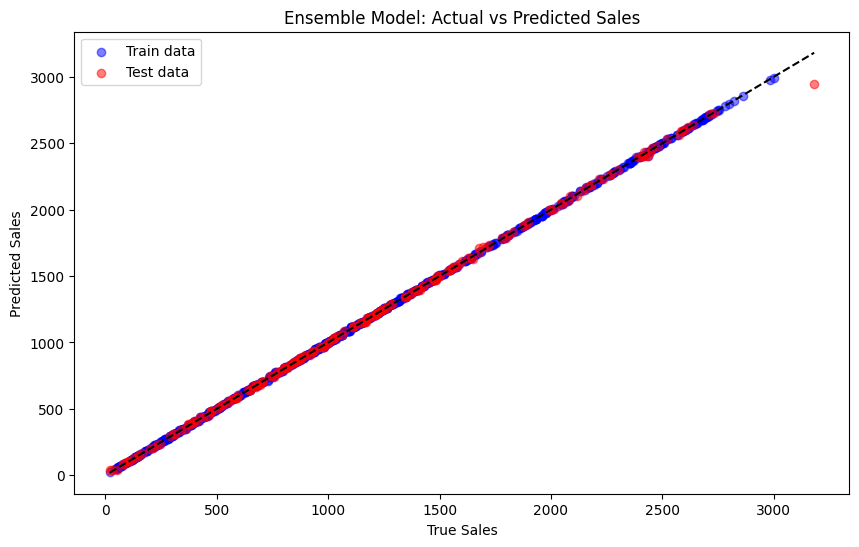

Ensemble Model Training MSE: 20.520659094915406, R²: 0.9999638301587023
Ensemble Model Testing MSE: 343.58749687187407, R²: 0.9993126406490246


In [ ]:
from sklearn.ensemble import StackingRegressor
import logging
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline

import sklearn
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import logging


# Ensemble function, combining all regression model, but only testing linear regression for now
def ensemble_model30(X_train, y_train, X_test, y_test):

    # Convert datetime columns to numeric (Unix timestamp)
    for col in X_train.select_dtypes(include=['datetime64']).columns:
        X_train[col] = X_train[col].astype(np.int64) // 10**9
        X_test[col] = X_test[col].astype(np.int64) // 10**9

    # Define base models
    base_models = [
        ('lasso_regression', lasso_regression_model(X_train, y_train, X_test, y_test)[0]),
        ('random_forest', random_forest(X_train, y_train, X_test, y_test)[0]),
         ('gradient_boosting', gradient_boosting(X_train, y_train, X_test, y_test)[0]),
        ('decision_tree', decision_tree(X_train, y_train, X_test, y_test)[0]),
        ('neural_network', neural_network(X_train, y_train, X_test, y_test)[0]),
        ('linear_regression', linear_regression_model(X_train, y_train, X_test, y_test)[0]),
        ('elastic_net', elastic_net(X_train, y_train, X_test, y_test)[0]),
        ('ridge_regression', ridge_regression(X_train, y_train, X_test, y_test)[0])

    ]

    # Define stacking regressor
    ensemble = StackingRegressor(
        estimators=base_models,
        final_estimator=GradientBoostingRegressor(),  # Final estimator, we could change it to liner regression i read its the standard final estimator
        passthrough=True
    )

    # Train the ensemble model
    logging.info("Training the ensemble model...")
    ensemble.fit(X_train, y_train)

    # Make predictions
    train_predictions = ensemble.predict(X_train)
    test_predictions = ensemble.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    logging.info(f"Ensemble Model Training MSE: {train_mse}, R²: {train_r2}")
    logging.info(f"Ensemble Model Testing MSE: {test_mse}, R²: {test_r2}")

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color='blue', alpha=0.5, label='Train data')
    plt.scatter(y_test, test_predictions, color='red', alpha=0.5, label='Test data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    plt.xlabel('True Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Ensemble Model: Actual vs Predicted Sales')
    plt.legend()
    plt.show()

    return ensemble, train_mse, test_mse, train_r2, test_r2



X = dataset.drop('estimated_sales', axis=1)
y = dataset['estimated_sales']

X, _ = encode_categorical_features(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the ensemble model
ensemble21, train_mse, test_mse, train_r2, test_r2 = ensemble_model30(X_train, y_train, X_test, y_test)

# Print final results
print(f"Ensemble Model Training MSE: {train_mse}, R²: {train_r2}")
print(f"Ensemble Model Testing MSE: {test_mse}, R²: {test_r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+06, tolerance: 4.499e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+04, tolerance: 3.649e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

Root Mean Squared Error: 20.33


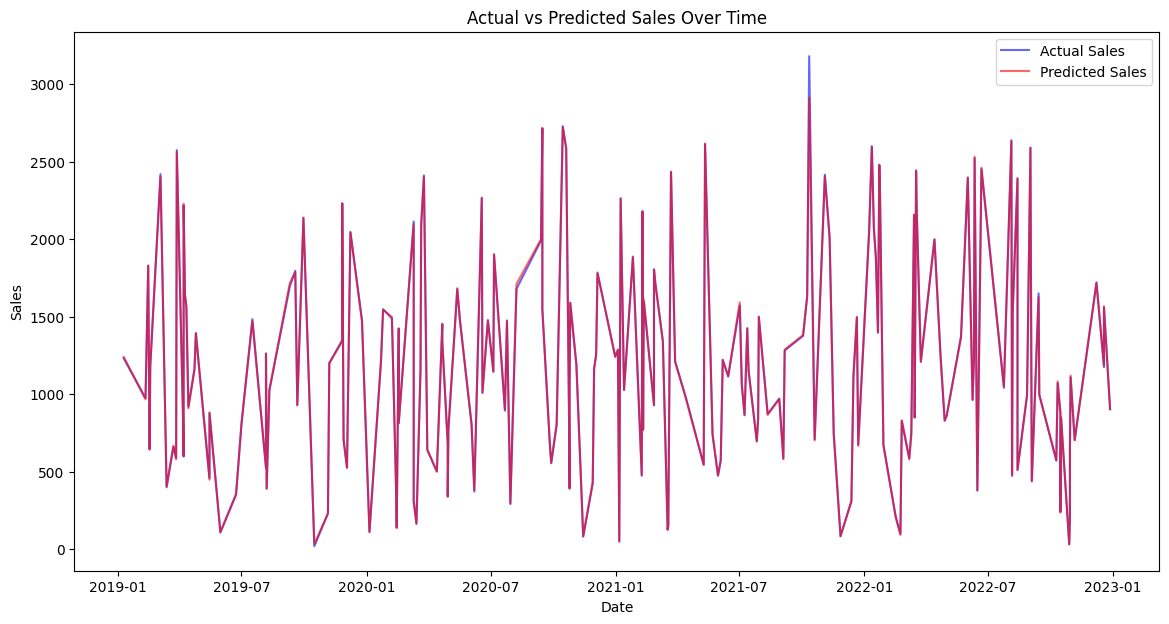

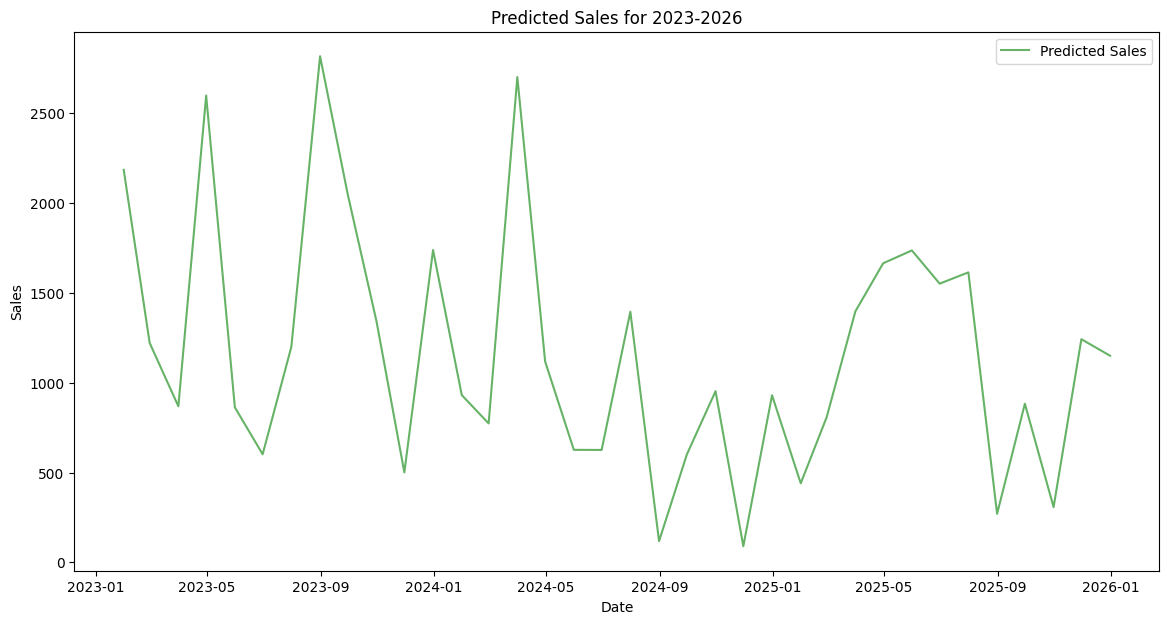

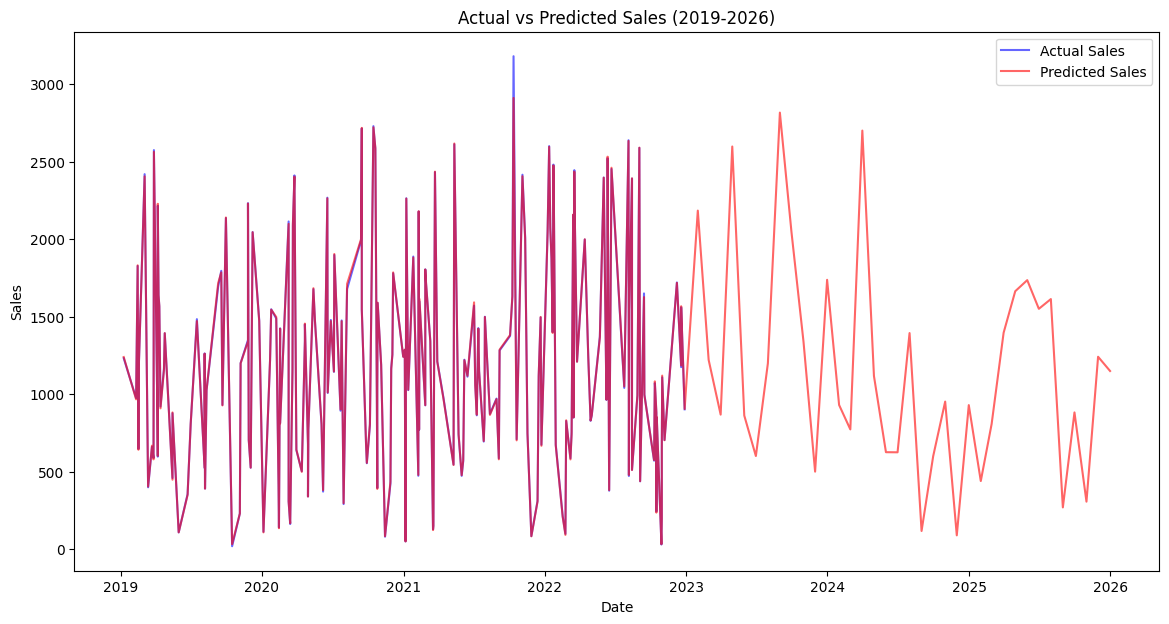

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = dataset.copy()  # copy to avoid modifying the original DataFrame

# Define the target and feature columns
X = df.drop('estimated_sales', axis=1)
y = df['estimated_sales']

# def encode_categorical_features(df):
#     df_encoded = pd.get_dummies(df, drop_first=True)
#     return df_encoded, df.columns[df.dtypes == 'object']

X, _ = encode_categorical_features(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert datetime columns to numeric (Unix timestamp)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype(np.int64) // 10**9
    X_test[col] = X_test[col].astype(np.int64) // 10**9

# base_regressors = [
#     ('linear', LinearRegression()),
#     ('tree', DecisionTreeRegressor()),
#     ('gbr', GradientBoostingRegressor()),
#     ('randomforest', RandomForestRegressor()),
#     ('lasso', Lasso()),
#     ('ridge', Ridge()),
#     ('elasticnet', ElasticNet()),
#     ('mlp', MLPRegressor())
# ]

# stacking_regressor = StackingRegressor(
#     estimators=base_regressors,
#     final_estimator=LinearRegression()
# )

# Train the stacking regressor
ensemble21.fit(X_train, y_train)

# Make predictions
y_pred = ensemble21.predict(X_test)

ensemble_model = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse:.2f}')

# Create a DataFrame for plotting
results = pd.DataFrame({
    'date': df.loc[X_test.index, 'order_date'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='date')

# Plot the actual vs predicted sales over time
plt.figure(figsize=(14, 7))
plt.plot(results['date'], results['Actual'], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(results['date'], results['Predicted'], label='Predicted Sales', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Over Time')
plt.legend()
plt.show()

future_X = X_train.copy()

# Predict future sales
future_predictions = ensemble21.predict(future_X)

# Generate future dates for 2023, 2024, 2025
future_dates = pd.date_range(start='2023-01-01', end='2025-12-31', freq='M')

# Create a DataFrame for future predictions
future_results = pd.DataFrame({
    'date': future_dates,
    'Predicted': future_predictions[:len(future_dates)]
})

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(future_results['date'], future_results['Predicted'], label='Predicted Sales', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales for 2023-2026')
plt.legend()
plt.show()

# Combine actual and predicted sales from 2019 to 2026
combined_results = pd.concat([results, future_results]).sort_values(by='date')

# Plot combined actual and predicted sales from 2019 to 2026
plt.figure(figsize=(14, 7))
plt.plot(combined_results['date'], combined_results['Actual'], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(combined_results['date'], combined_results['Predicted'], label='Predicted Sales', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (2019-2026)')
plt.legend()
plt.show()

# print("shape of ensemble mode")
# print(ensemble_model.shape)


In [ ]:
#I was trying to save the best ensemble model to re use it but it got change modified
drive.mount('/content/drive')
import dill

import os
file_path = '/content/drive/MyDrive/ensemble_model.pkl'
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    with open(file_path, 'rb') as file:
        ensemble = dill.load(file)
else:
    print("Error: The file is either missing or empty. Please check the file path and try again.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file is either missing or empty. Please check the file path and try again.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


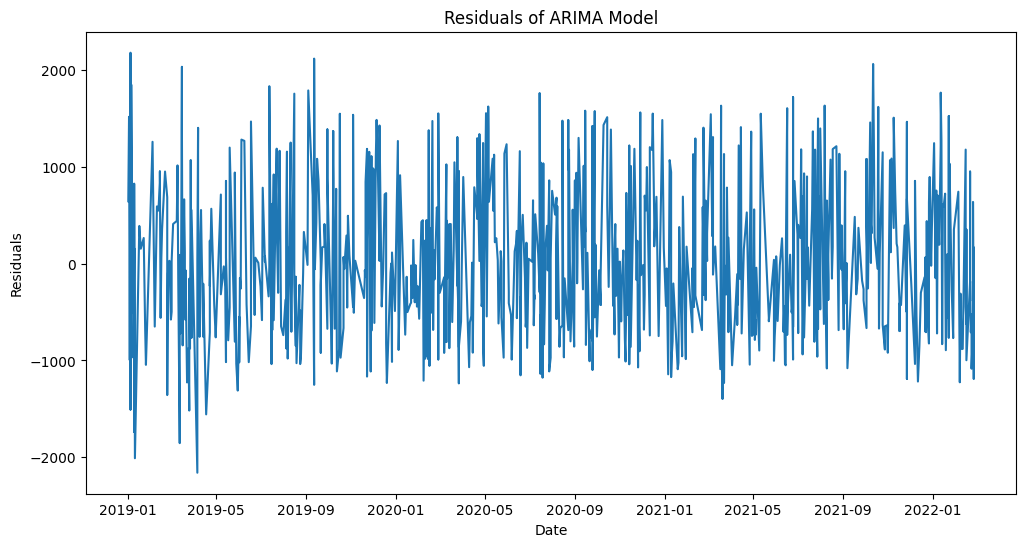

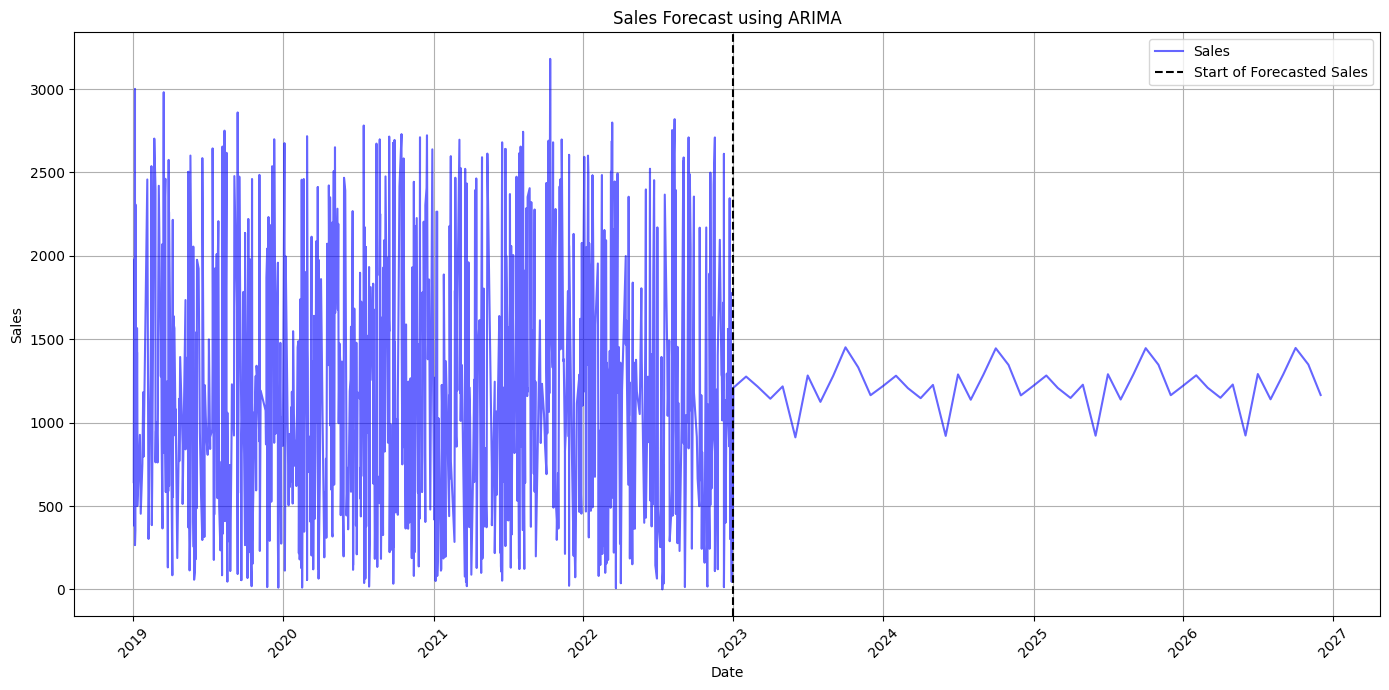

            predicted_sales
2023-01-01      1209.287390
2023-02-01      1276.383991
2023-03-01      1216.459108
2023-04-01      1143.438772
2023-05-01      1217.453483
2023-06-01       911.887158
2023-07-01      1282.783485
2023-08-01      1124.575673
2023-09-01      1280.304776
2023-10-01      1451.818443
2023-11-01      1331.609646
2023-12-01      1164.520621
2024-01-01      1220.659610
2024-02-01      1281.397273
2024-03-01      1206.903326
2024-04-01      1146.846503
2024-05-01      1226.291223
2024-06-01       920.546512
2024-07-01      1289.145885
2024-08-01      1137.478107
2024-09-01      1288.160349
2024-10-01      1445.625369
2024-11-01      1346.240193
2024-12-01      1163.429166
2025-01-01      1221.948837
2025-02-01      1282.613645
2025-03-01      1207.952781
2025-04-01      1148.044480
2025-05-01      1227.551412
2025-06-01       921.804657
2025-07-01      1290.377714
2025-08-01      1138.784866
2025-09-01      1289.409286
2025-10-01      1446.713350
2025-11-01      1347

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split


# Function to forecast future sales using ARIMA
def forecast_future_sales_arima(train_data, future_dates):
    """
    Function to forecast future sales using the ARIMA model.
    """
    # time series format
    train_data = train_data.set_index('order_date')

    # Fit the ARIMA model
    logging.info("Fitting the ARIMA model...")
    arima_model = SARIMAX(train_data['estimated_sales'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
    arima_result = arima_model.fit(disp=False)

    #  future predictions
    logging.info("Making future predictions...")
    forecast = arima_result.get_forecast(steps=len(future_dates))
    forecast_df = forecast.conf_int()
    forecast_df['predicted_sales'] = forecast.predicted_mean
    forecast_df.index = future_dates

    return forecast_df, arima_result


# Convert order_date to datetime and sort the dataset
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
dataset = dataset.sort_values(by='order_date')

# Define future dates for forecasting
future_dates = pd.date_range(start='2023-01-01', end='2026-12-31', freq='MS')

# Split data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=False)

# Forecast future sales
forecast_df, arima_result = forecast_future_sales_arima(train_data, future_dates)

# Plot the residuals
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Combine historical and forecasted data for plotting
combined_df = pd.concat([dataset[['order_date', 'estimated_sales']].rename(columns={'order_date': 'date', 'estimated_sales': 'sales'}),
forecast_df[['predicted_sales']].rename(columns={'predicted_sales': 'sales'}).reset_index().rename(columns={'index': 'date'})])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(combined_df['date'], combined_df['sales'], label='Sales', color='blue', alpha=0.6)
plt.axvline(x=pd.Timestamp('2023-01-01'), color='black', linestyle='--', label='Start of Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast using ARIMA')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Print forecasted sales
print(forecast_df[['predicted_sales']])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


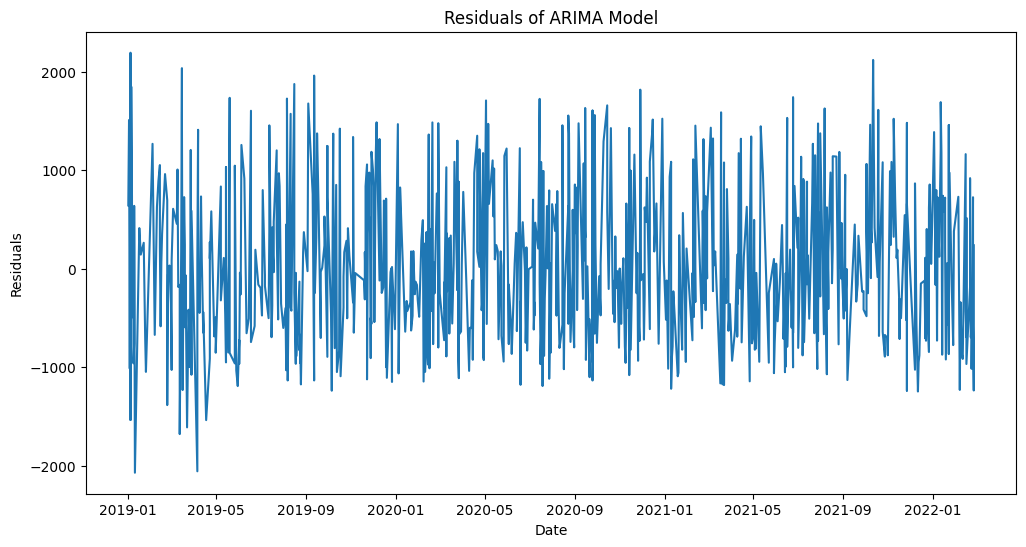

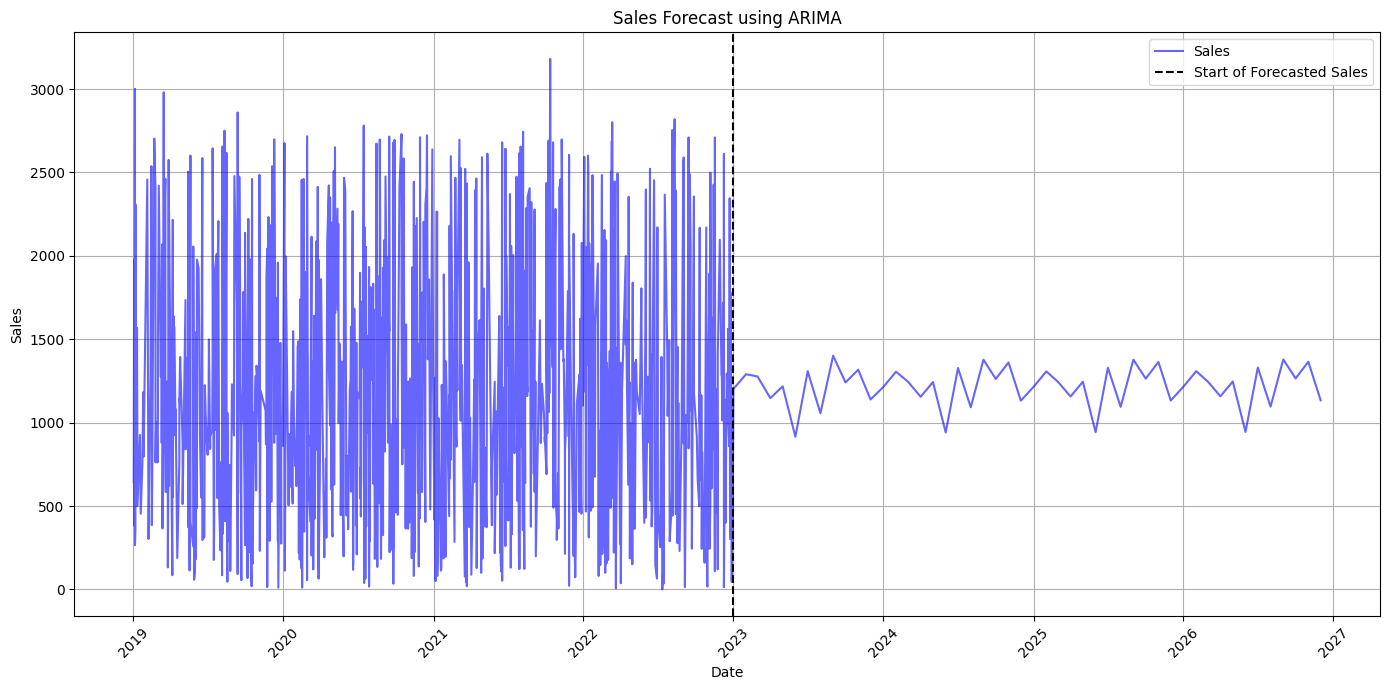

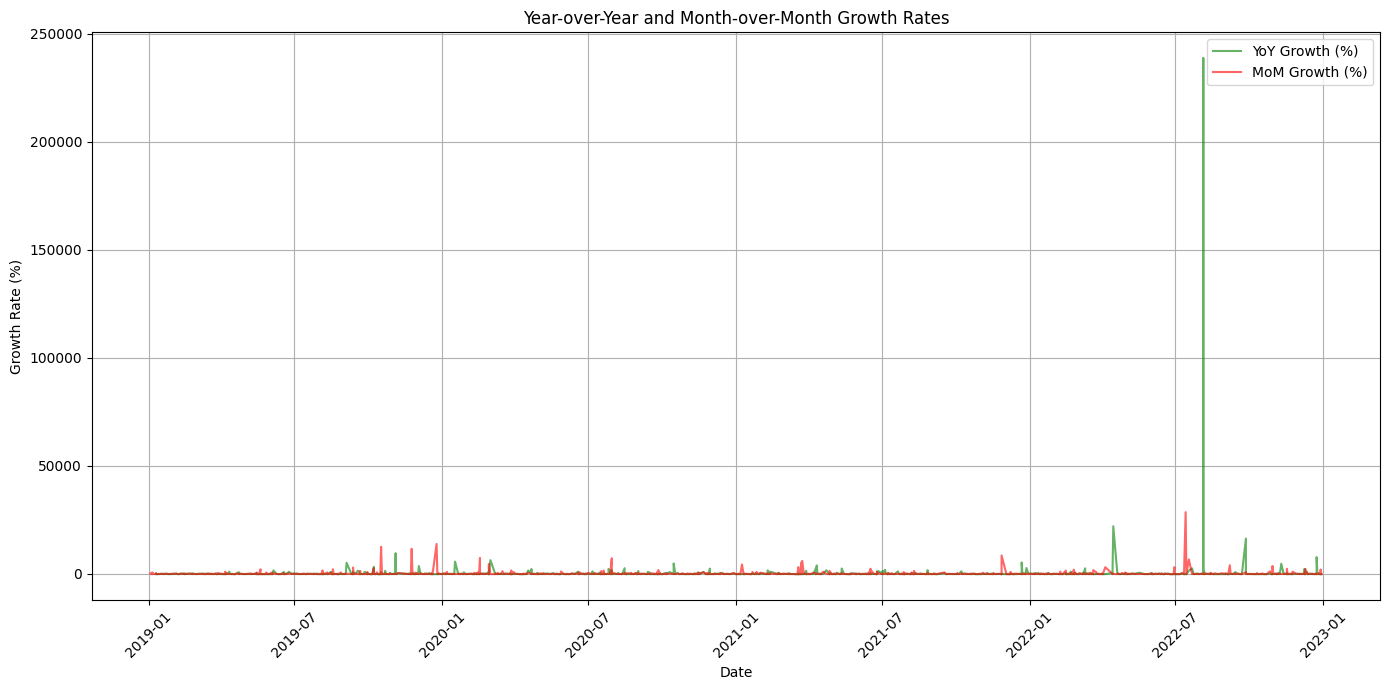

            predicted_sales
2023-01-01      1201.818373
2023-02-01      1290.473240
2023-03-01      1276.749660
2023-04-01      1146.984113
2023-05-01      1217.790655
2023-06-01       915.849792
2023-07-01      1308.733142
2023-08-01      1056.305132
2023-09-01      1401.638334
2023-10-01      1241.085644
2023-11-01      1317.526470
2023-12-01      1138.784927
2024-01-01      1213.557011
2024-02-01      1305.455144
2024-03-01      1245.940662
2024-04-01      1155.434207
2024-05-01      1243.412494
2024-06-01       941.035947
2024-07-01      1327.407178
2024-08-01      1092.367398
2024-09-01      1377.554131
2024-10-01      1262.136903
2024-11-01      1361.068532
2024-12-01      1131.837780
2025-01-01      1215.143024
2025-02-01      1307.159481
2025-03-01      1245.974419
2025-04-01      1156.900245
2025-05-01      1245.505005
2025-06-01       943.112563
2025-07-01      1329.246214
2025-08-01      1094.840805
2025-09-01      1377.833227
2025-10-01      1264.062666
2025-11-01      1363

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split



# Function to calculate YoY and MoM growth rates
def calculate_growth_rates(df):
    df['YoY Growth (%)'] = df['estimated_sales'].pct_change(periods=12) * 100
    df['MoM Growth (%)'] = df['estimated_sales'].pct_change() * 100

    # Handle unrealistic growth rates due to zero or near-zero sales in previous periods
    df['YoY Growth (%)'] = np.where(df['estimated_sales'].shift(12) <= 0, np.nan, df['YoY Growth (%)'])
    df['MoM Growth (%)'] = np.where(df['estimated_sales'].shift(1) <= 0, np.nan, df['MoM Growth (%)'])
    return df

# Function to forecast future sales using ARIMA
def forecast_future_sales_arima(train_data, future_dates):

    train_data = train_data.set_index('order_date')

    # Fit the ARIMA model
    logging.info("Fitting the ARIMA model...")
    arima_model = SARIMAX(train_data['estimated_sales'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
    arima_result = arima_model.fit(disp=False)

    # Make future predictions
    logging.info("Making future predictions...")
    forecast = arima_result.get_forecast(steps=len(future_dates))
    forecast_df = forecast.conf_int()
    forecast_df['predicted_sales'] = forecast.predicted_mean
    forecast_df.index = future_dates

    return forecast_df, arima_result

# Convert order_date to datetime and sort the dataset
df = dataset.copy()
df['order_date'] = pd.to_datetime(df['order_date'])
df = df.sort_values(by='order_date')

# Calculate growth rates
df = calculate_growth_rates(df)

# Define future dates for forecasting
future_dates = pd.date_range(start='2023-01-01', end='2026-12-31', freq='MS')

# Split data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Forecast future sales
forecast_df, arima_result = forecast_future_sales_arima(train_data, future_dates)

# Plot the residuals
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Combine historical and forecasted data for plotting
combined_df = pd.concat([df[['order_date', 'estimated_sales']].rename(columns={'order_date': 'date', 'estimated_sales': 'sales'}),
          forecast_df[['predicted_sales']].rename(columns={'predicted_sales': 'sales'}).reset_index().rename(columns={'index': 'date'})])

# Plot the sales forecast
plt.figure(figsize=(14, 7))
plt.plot(combined_df['date'], combined_df['sales'], label='Sales', color='blue', alpha=0.6)
plt.axvline(x=pd.Timestamp('2023-01-01'), color='black', linestyle='--', label='Start of Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast using ARIMA')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot YoY and MoM growth rates
plt.figure(figsize=(14, 7))
plt.plot(df['order_date'], df['YoY Growth (%)'], label='YoY Growth (%)', color='green', alpha=0.6)
plt.plot(df['order_date'], df['MoM Growth (%)'], label='MoM Growth (%)', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Year-over-Year and Month-over-Month Growth Rates')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Print forecasted sales
print(forecast_df[['predicted_sales']])


ADF Statistic: -16.543713761089343
p-value: 1.973298327240552e-29
Data is already stationary.


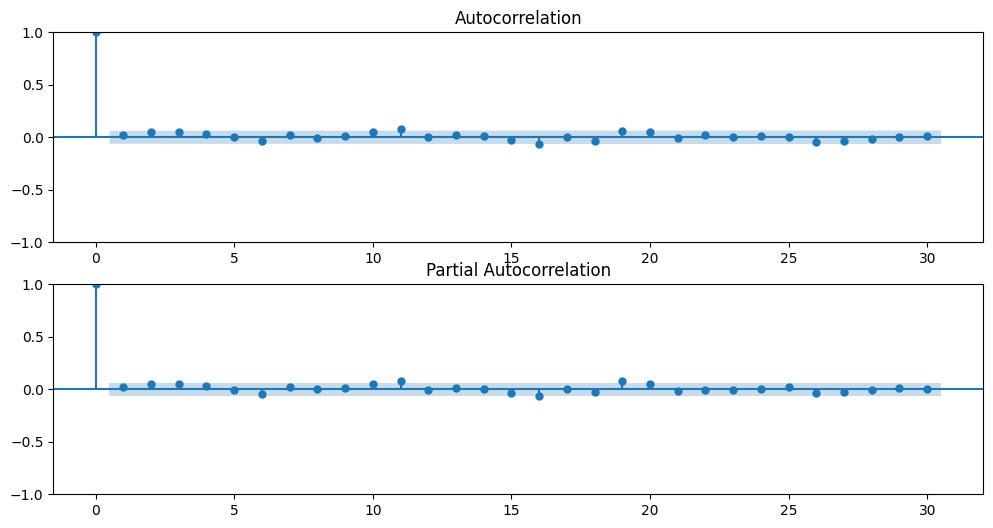

                 0
count   992.000000
mean     -3.184155
std     763.885938
min   -1209.862261
25%    -645.333579
50%    -132.832226
75%     543.619349
max    2084.441938


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import logging

df=dataset.copy()

# Function to ensure the data is stationary
def ensure_stationarity(data, column):
    result = adfuller(data[column])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        # Differencing the data if not stationary
        data[column + '_diff'] = data[column].diff().dropna()
        print("Data was differenced to achieve stationarity.")
    else:
        data[column + '_diff'] = data[column]
        print("Data is already stationary.")
    return data

# Function to plot ACF and PACF
def plot_acf_pacf(data, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plot_acf(data[column].dropna(), ax=plt.gca())
    plt.subplot(212)
    plot_pacf(data[column].dropna(), ax=plt.gca())
    plt.show()

#REMINDER: ACF is autocorrelation function it measures correlations between oberservations of a timer serious in different
#time lags, its gonna help us look at current and past values, trends, and PACf is partial ACF meaning it removes th effect of
# shorter lags

# Umar read https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/ if u get confused


# Convert order_date to datetime and set as index
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)

# Check for missing values and handle them if necessary
df = df.dropna()

# Ensure the data is stationary
df = ensure_stationarity(df, 'estimated_sales')

# Plot ACF and PACF to determine ARIMA parameters
plot_acf_pacf(df, 'estimated_sales_diff')

# Define ARIMA order based on ACF and PACF plots
arima_order = (1, 1, 1)  # Update based on ACF and PACF plots

print(residuals.describe())


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


664/664 - 4s - 6ms/step - loss: 0.0649 - val_loss: 0.0571
Epoch 2/50
664/664 - 2s - 3ms/step - loss: 0.0579 - val_loss: 0.0559
Epoch 3/50
664/664 - 2s - 3ms/step - loss: 0.0567 - val_loss: 0.0560
Epoch 4/50
664/664 - 2s - 3ms/step - loss: 0.0572 - val_loss: 0.0575
Epoch 5/50
664/664 - 2s - 3ms/step - loss: 0.0567 - val_loss: 0.0558
Epoch 6/50
664/664 - 2s - 3ms/step - loss: 0.0569 - val_loss: 0.0554
Epoch 7/50
664/664 - 2s - 3ms/step - loss: 0.0560 - val_loss: 0.0552
Epoch 8/50
664/664 - 2s - 3ms/step - loss: 0.0570 - val_loss: 0.0556
Epoch 9/50
664/664 - 2s - 3ms/step - loss: 0.0563 - val_loss: 0.0555
Epoch 10/50
664/664 - 2s - 3ms/step - loss: 0.0566 - val_loss: 0.0571
Epoch 11/50
664/664 - 2s - 3ms/step - loss: 0.0564 - val_loss: 0.0555
Epoch 12/50
664/664 - 2s - 3ms/step - loss: 0.0567 - val_loss: 0.0552
Epoch 13/50
664/664 - 2s - 3ms/step - loss: 0.0566 - val_loss: 0.0556
Epoch 14/50
664/664 - 2s - 3ms/step - loss: 0.0568 - val_loss: 0.0555
Epoch 15/50
664/664 - 2s - 3ms/step - lo

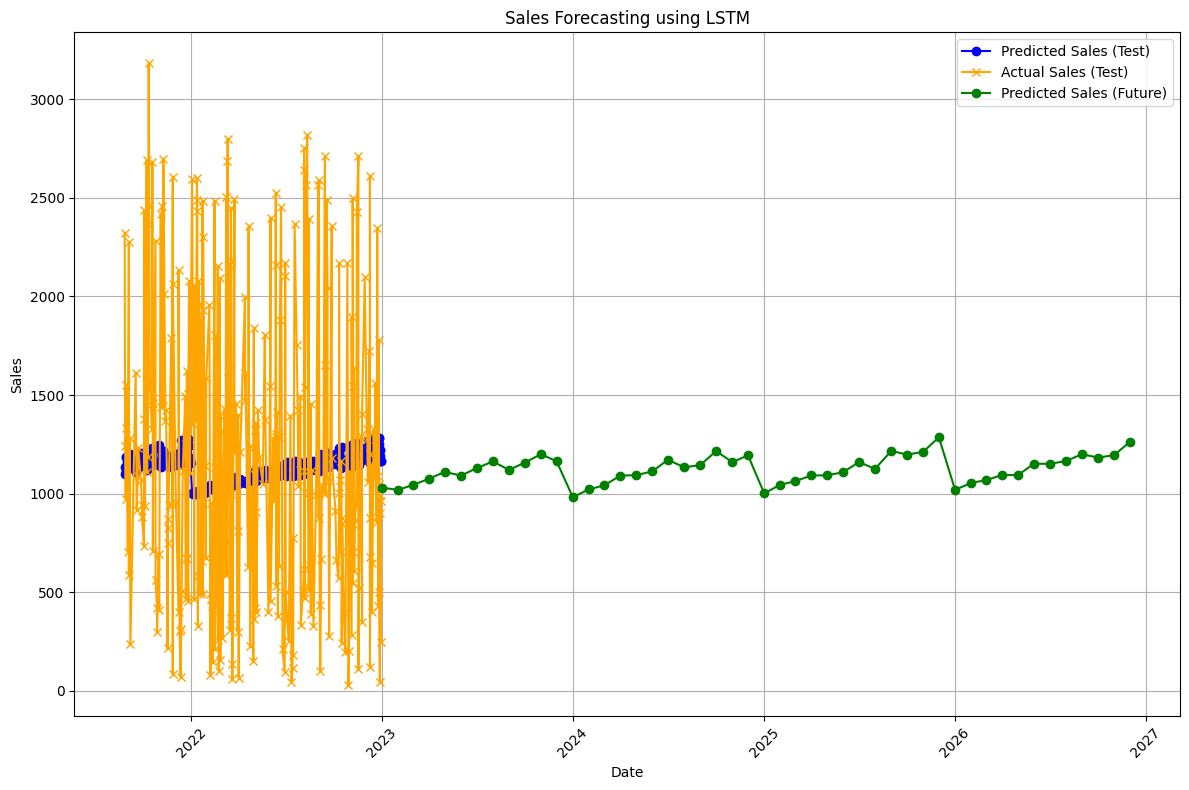

         Date  Predicted_Sales
0  2023-01-01      1030.454956
1  2023-02-01      1019.349609
2  2023-03-01      1044.249023
3  2023-04-01      1075.706421
4  2023-05-01      1110.621948
5  2023-06-01      1091.870361
6  2023-07-01      1129.065186
7  2023-08-01      1163.446289
8  2023-09-01      1120.817627
9  2023-10-01      1157.585693
10 2023-11-01      1200.229980
11 2023-12-01      1164.376587
12 2024-01-01       982.202759
13 2024-02-01      1022.425842
14 2024-03-01      1041.979126
15 2024-04-01      1092.023804
16 2024-05-01      1093.841309
17 2024-06-01      1113.538940
18 2024-07-01      1171.892090
19 2024-08-01      1133.586426
20 2024-09-01      1145.595215
21 2024-10-01      1216.199829
22 2024-11-01      1159.931763
23 2024-12-01      1194.556274
24 2025-01-01      1001.654419
25 2025-02-01      1045.954712
26 2025-03-01      1063.224854
27 2025-04-01      1092.427246
28 2025-05-01      1093.053345
29 2025-06-01      1108.974731
30 2025-07-01      1160.482300
31 2025-

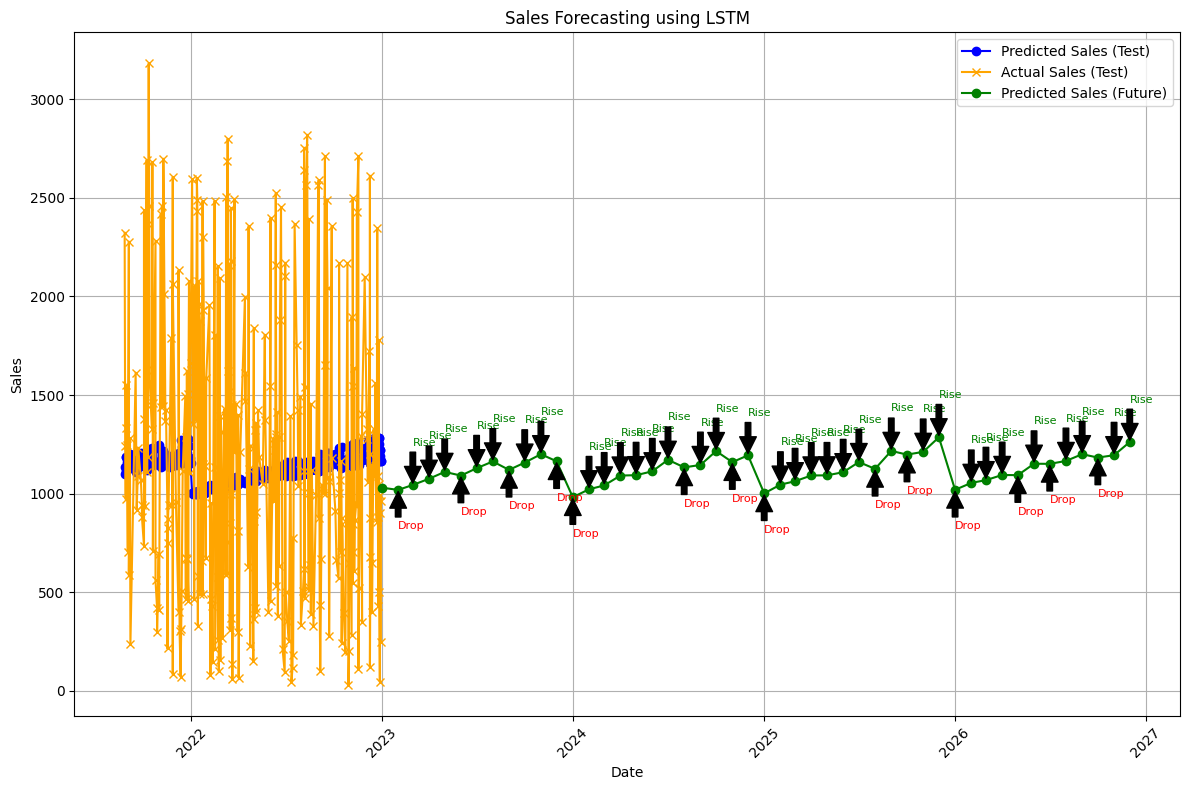

         Date  Predicted_Sales
0  2023-01-01      1030.454956
1  2023-02-01      1019.349609
2  2023-03-01      1044.249023
3  2023-04-01      1075.706421
4  2023-05-01      1110.621948
5  2023-06-01      1091.870361
6  2023-07-01      1129.065186
7  2023-08-01      1163.446289
8  2023-09-01      1120.817627
9  2023-10-01      1157.585693
10 2023-11-01      1200.229980
11 2023-12-01      1164.376587
12 2024-01-01       982.202759
13 2024-02-01      1022.425842
14 2024-03-01      1041.979126
15 2024-04-01      1092.023804
16 2024-05-01      1093.841309
17 2024-06-01      1113.538940
18 2024-07-01      1171.892090
19 2024-08-01      1133.586426
20 2024-09-01      1145.595215
21 2024-10-01      1216.199829
22 2024-11-01      1159.931763
23 2024-12-01      1194.556274
24 2025-01-01      1001.654419
25 2025-02-01      1045.954712
26 2025-03-01      1063.224854
27 2025-04-01      1092.427246
28 2025-05-01      1093.053345
29 2025-06-01      1108.974731
30 2025-07-01      1160.482300
31 2025-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Enhanced feature engineering function
def enhanced_feature_engineering(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['order_date_numeric'] = df['order_date'].astype(np.int64) // 10**9
    df['month'] = df['order_date'].dt.month
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['quarter'] = df['order_date'].dt.quarter
    df['day_of_year'] = df['order_date'].dt.dayofyear
    df['week_of_year'] = df['order_date'].dt.isocalendar().week
    return df

# Apply feature engineering
dataset = enhanced_feature_engineering(dataset)

# Ensure dataset is sorted by order_date
dataset = dataset.sort_values(by='order_date')

# Select features and target
features = ['order_date_numeric', 'month', 'day_of_week', 'is_weekend', 'quarter', 'day_of_year', 'week_of_year']
target = 'estimated_sales'

X = dataset[features]
y = dataset[target]

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape data to fit LSTM [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into training and testing sets
train_size = int(len(X_scaled) * 0.67)
test_size = len(X_scaled) - train_size
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_scaled.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2, validation_data=(X_test, y_test))

# Make predictions
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
y_train_actual = scaler_y.inverse_transform(y_train)
test_predict = scaler_y.inverse_transform(test_predict)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate root mean squared error
train_score = np.sqrt(np.mean((train_predict[:, 0] - y_train_actual[:, 0])**2))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(np.mean((test_predict[:, 0] - y_test_actual[:, 0])**2))
print('Test Score: %.2f RMSE' % (test_score))

# Generate future dates for 2023, 2024, 2025, and 2026
future_dates = pd.date_range(start='2023-01-01', end='2026-12-31', freq='MS')

# Perform feature engineering for future dates
future_df = pd.DataFrame(future_dates, columns=['order_date'])
future_df = enhanced_feature_engineering(future_df)

# Select features for future dates
future_X = future_df[features]

# Scale the future data
future_X_scaled = scaler_X.transform(future_X)
future_X_scaled = future_X_scaled.reshape((future_X_scaled.shape[0], 1, future_X_scaled.shape[1]))

# Make predictions for future dates
future_predicted_sales = lstm_model.predict(future_X_scaled)
future_predicted_sales = scaler_y.inverse_transform(future_predicted_sales)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(dataset['order_date'][train_size:].reset_index(drop=True), test_predict, color='blue', marker='o', linestyle='-', label='Predicted Sales (Test)')
plt.plot(dataset['order_date'][train_size:].reset_index(drop=True), y_test_actual, color='orange', marker='x', linestyle='-', label='Actual Sales (Test)')
plt.plot(future_dates, future_predicted_sales, color='green', marker='o', linestyle='-', label='Predicted Sales (Future)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print future predicted sales
future_sales_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sales': future_predicted_sales.flatten()})
print(future_sales_df)

# Plot the results with annotations
plt.figure(figsize=(12, 8))
plt.plot(dataset['order_date'][train_size:].reset_index(drop=True), test_predict, color='blue', marker='o', linestyle='-', label='Predicted Sales (Test)')
plt.plot(dataset['order_date'][train_size:].reset_index(drop=True), y_test_actual, color='orange', marker='x', linestyle='-', label='Actual Sales (Test)')
plt.plot(future_dates, future_predicted_sales, color='green', marker='o', linestyle='-', label='Predicted Sales (Future)')

# Annotate significant points
for i in range(len(future_dates)):
    if i > 0 and future_predicted_sales[i] > future_predicted_sales[i-1]:
        plt.annotate('Rise', xy=(future_dates[i], future_predicted_sales[i]), xytext=(future_dates[i], future_predicted_sales[i] + 200),
                     arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='green')
    elif i > 0 and future_predicted_sales[i] < future_predicted_sales[i-1]:
        plt.annotate('Drop', xy=(future_dates[i], future_predicted_sales[i]), xytext=(future_dates[i], future_predicted_sales[i] - 200),
                     arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print future predicted sales
future_sales_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sales': future_predicted_sales.flatten()})
print(future_sales_df)



Test RMSE: 798.952593973499


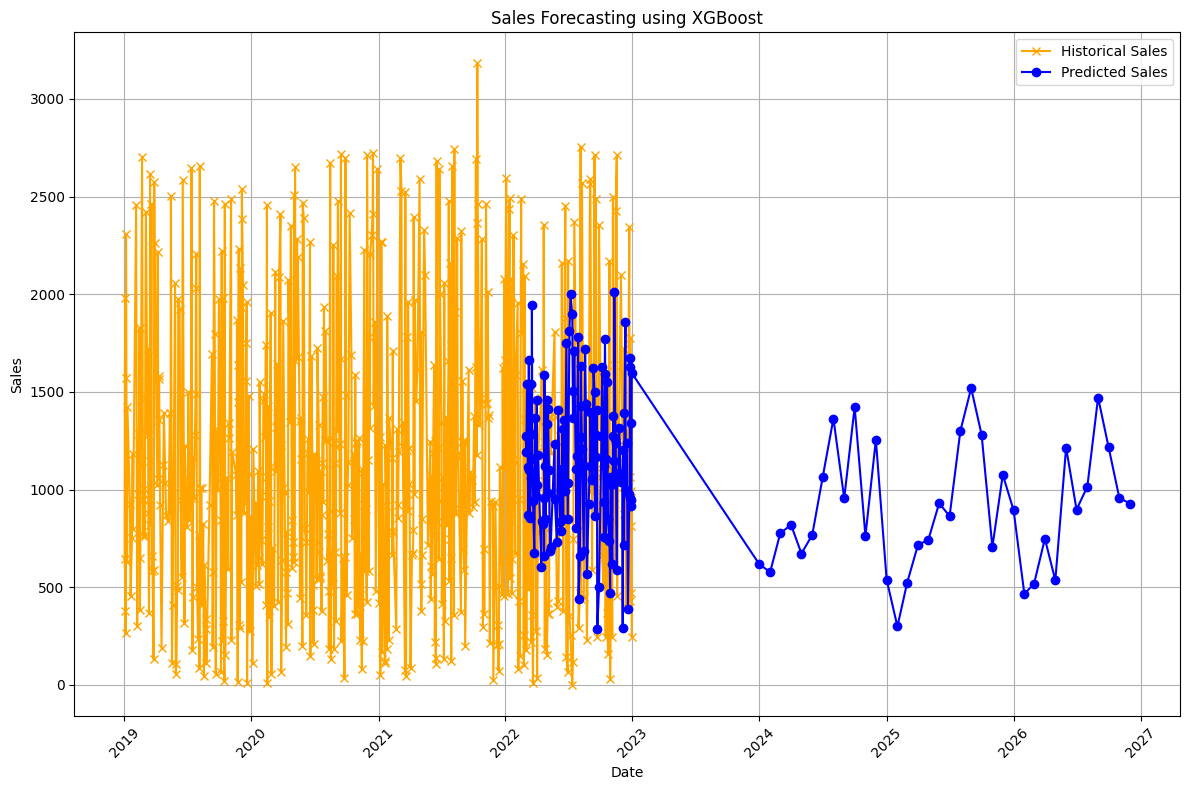

         Date  Predicted_Sales
0  2024-01-01       617.198914
1  2024-02-01       577.736755
2  2024-03-01       775.373474
3  2024-04-01       819.945496
4  2024-05-01       672.372986
5  2024-06-01       767.251770
6  2024-07-01      1062.301270
7  2024-08-01      1363.380493
8  2024-09-01       954.282227
9  2024-10-01      1422.694946
10 2024-11-01       762.162842
11 2024-12-01      1254.450684
12 2025-01-01       538.307800
13 2025-02-01       298.977539
14 2025-03-01       523.472656
15 2025-04-01       715.880005
16 2025-05-01       743.756042
17 2025-06-01       929.994080
18 2025-07-01       864.087830
19 2025-08-01      1300.297363
20 2025-09-01      1518.921143
21 2025-10-01      1281.207397
22 2025-11-01       705.555054
23 2025-12-01      1076.130737
24 2026-01-01       894.047974
25 2026-02-01       465.290497
26 2026-03-01       518.840698
27 2026-04-01       748.622681
28 2026-05-01       535.003418
29 2026-06-01      1214.822876
30 2026-07-01       897.615723
31 2026-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Enhanced feature engineering function
def enhanced_feature_engineering(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['order_date_numeric'] = df['order_date'].astype(np.int64) // 10**9
    df['month'] = df['order_date'].dt.month
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['quarter'] = df['order_date'].dt.quarter
    df['day_of_year'] = df['order_date'].dt.dayofyear
    df['week_of_year'] = df['order_date'].dt.isocalendar().week.astype(int)
    df['year'] = df['order_date'].dt.year
    return df

# Perform enhanced feature engineering
df7 = enhanced_feature_engineering(dataset)

# Ensure dataset is sorted by order_date
df7 = df7.sort_values(by='order_date')

# Select features and target
features = ['order_date_numeric', 'month', 'day_of_week', 'is_weekend', 'quarter', 'day_of_year', 'week_of_year', 'year']
target = 'estimated_sales'

X = df7[features]
y = df7[target]

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8)
xgr_model = model.fit(X_train, y_train)

# Make predictions on test data
predicted_sales_test = model.predict(X_test)
predicted_sales_test = scaler_y.inverse_transform(predicted_sales_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), predicted_sales_test))
print(f'Test RMSE: {rmse}')

# Generate future dates for 2024, 2025, 2026
future_dates = pd.date_range(start='2024-01-01', end='2026-12-31', freq='MS')
future_df = pd.DataFrame({'order_date': future_dates})
future_df = enhanced_feature_engineering(future_df)

# Scale future features
future_features = future_df[features]
future_features_scaled = scaler_X.transform(future_features)

# Make predictions on future data
future_predictions = model.predict(future_features_scaled)
future_predictions = scaler_y.inverse_transform(future_predictions.reshape(-1, 1))

# Combine historical and future predictions for plotting
historical_dates = df7['order_date'][len(X_train):].reset_index(drop=True)
historical_sales = predicted_sales_test

combined_dates = pd.concat([historical_dates, future_df['order_date']], ignore_index=True)
combined_sales = np.concatenate([historical_sales.flatten(), future_predictions.flatten()])

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(df7['order_date'], df7['estimated_sales'], color='orange', marker='x', linestyle='-', label='Historical Sales')
plt.plot(combined_dates, combined_sales, color='blue', marker='o', linestyle='-', label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using XGBoost')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

future_sales_df = pd.DataFrame({'Date': future_dates, 'Predicted_Sales': future_predictions.flatten()})
print(future_sales_df)


In [ ]:
pip install fbprophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwzjne5f2/i1adbzae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwzjne5f2/zrcaj2n8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56631', 'data', 'file=/tmp/tmpwzjne5f2/i1adbzae.json', 'init=/tmp/tmpwzjne5f2/zrcaj2n8.json', 'output', 'file=/tmp/tmpwzjne5f2/prophet_model_7mgbc_z/prophet_model-20240801103227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:32:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:32:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

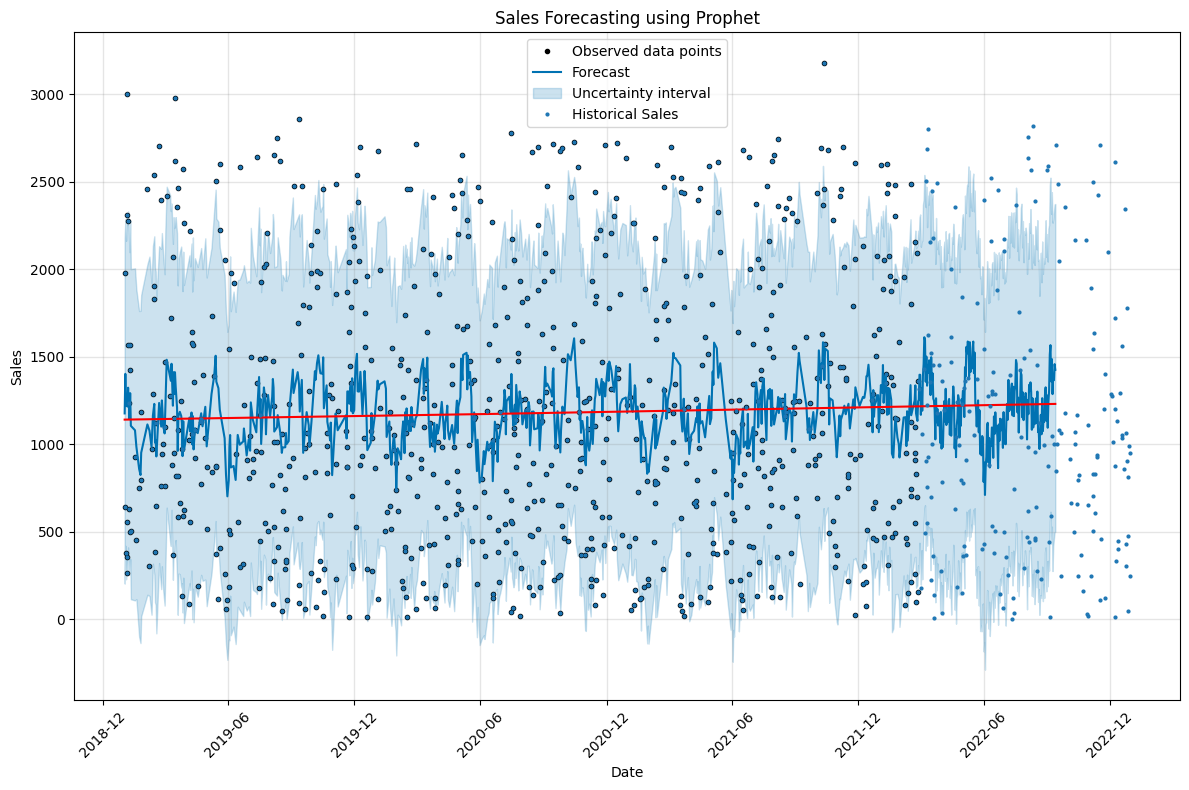

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


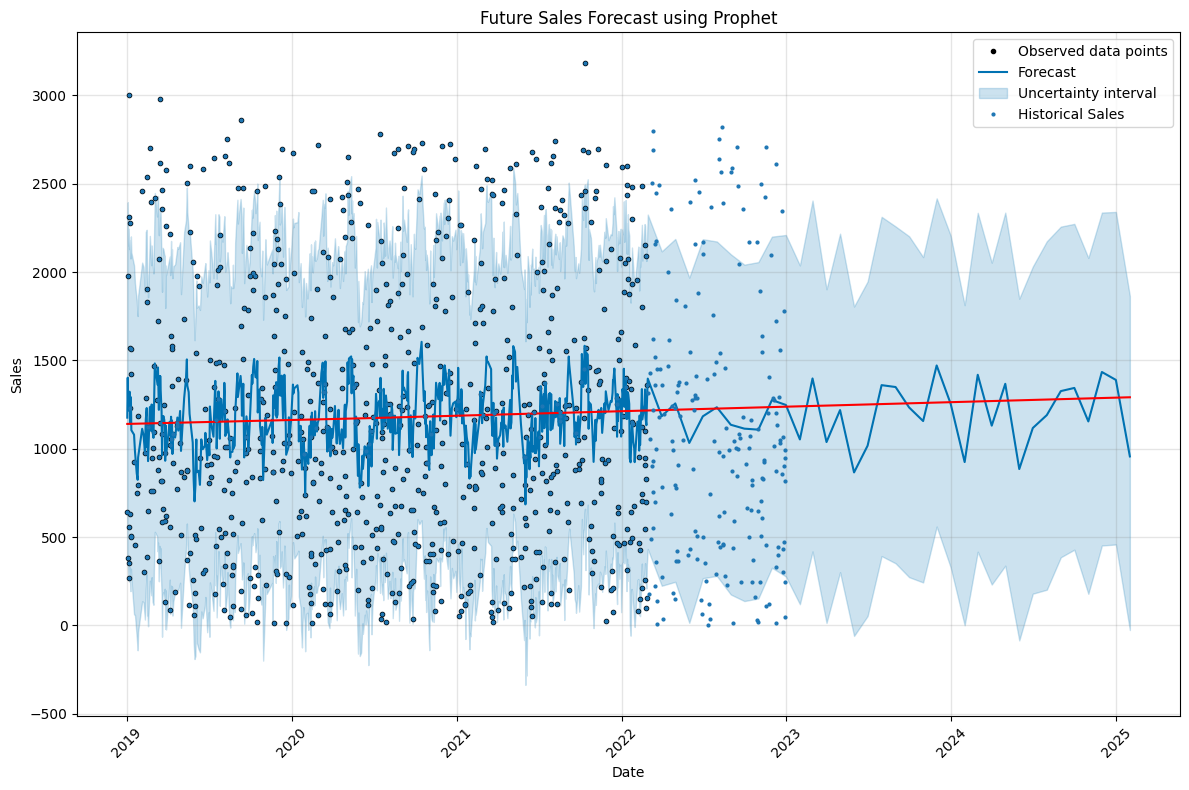

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

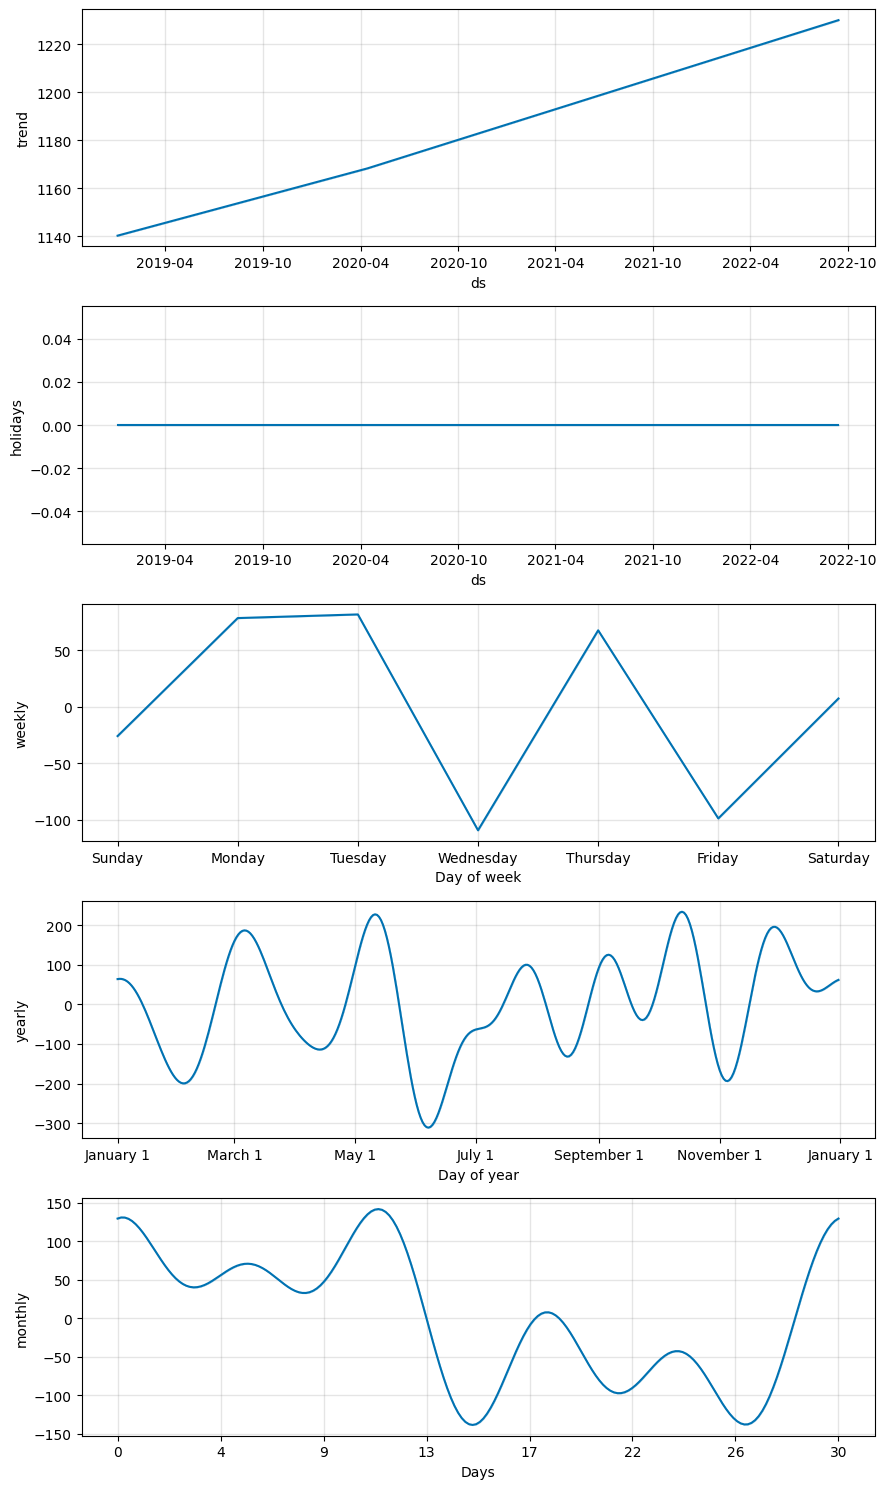

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

#NOTE: THIS IS THE BEST FORECASTING, IT GIVES MUCH BETTER UNDERSTANDING OF THE VISUALZATIONS BETTER THAN
#THE THREE PREVIOUS FORCASTING MODELS USED, amria, lstm, xgb

#its easier to make interperations using this forcasting tool model

# Prepare the data for Prophet
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
dataset = dataset.rename(columns={'order_date': 'ds', 'estimated_sales': 'y'})

# Add additional features for regressor (if available)
# Example: dataset['additional_feature'] = ...

# Train-test split
train_size = int(len(dataset) * 0.8)
train_data = dataset[:train_size]
test_data = dataset[train_size:]

# Define holidays (example with US holidays)
holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2023-01-01', '2023-07-04', '2023-12-25',
                        '2024-01-01', '2024-07-04', '2024-12-25',
                        '2025-01-01', '2025-07-04', '2025-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

# fit the Prophet model with holidays and additional regressors
model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
# Add custom seasonalities for more depth and interpertations
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Add regressors (if any)
# model.add_regressor('additional_feature')

p_model = model.fit(train_data)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = model.predict(future)

# Plot the results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = model.plot(forecast, ax=ax)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.plot(dataset['ds'], dataset['y'], 'o', markersize=2, label='Historical Sales')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using Prophet')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate future dates for 2024, 2025, and 2026
future_dates = model.make_future_dataframe(periods=3*12, freq='M')
future_forecast = model.predict(future_dates)

# Plot the future forecast
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = model.plot(future_forecast, ax=ax)
add_changepoints_to_plot(fig.gca(), model, future_forecast)
plt.plot(dataset['ds'], dataset['y'], 'o', markersize=2, label='Historical Sales')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Future Sales Forecast using Prophet')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()


In [ ]:
#END